In [1]:
import pandas as pd
import numpy as np

In [2]:
#Data loading:
Phenotypes = pd.read_csv(r"C:\Users\Ella Katz\Desktop\Post-doc\Personal\Springboard\git_hub_projects\Second_capstone\Datasets\All_Data_emmeans_info_V1.csv")
Classifications = pd.read_csv(r"C:\Users\Ella Katz\Desktop\Post-doc\Personal\Springboard\git_hub_projects\Second_capstone\Datasets\Seeds_classification.csv")
Environmental_data = pd.read_csv(r"C:\Users\Ella Katz\Desktop\Post-doc\Personal\Springboard\git_hub_projects\Second_capstone\Datasets\Environmental_data.csv")

In [3]:
print(Phenotypes.shape)
print(Classifications.shape)
print(Environmental_data.shape)
print("HI")

(3888, 48)
(797, 2)
(1131, 212)
HI


In [4]:
print(Phenotypes.head())
print(Classifications.head())
print(Environmental_data.head())

  CS_number         name country  latitude  longitude     collector seq_by  \
0   CS76347      Aitba-2     MAR   31.4800      0.000             0    MPI   
1   CS76347      Aitba-2     MAR   31.4800      0.000             0    MPI   
2   CS76347      Aitba-2     MAR   31.4800      0.000             0    MPI   
3   CS76347      Aitba-2     MAR   31.4800      0.000             0    MPI   
4   CS76350  Vezzano-2.2     ITA   46.6297     10.817  Joerg Wunder    MPI   

  Experiment N_source  N_concentration  ... Aliphatic   Indolic        C3  \
0          C  NH4HCO3              0.1  ...  1.175086  0.166070  0.776150   
1          C  NH4HCO3              1.0  ...  3.728467  0.424037  3.111164   
2          C     KNO3              0.1  ...  0.348629  0.072737  0.210332   
3          C     KNO3              1.0  ...  0.397285  0.044411  0.244144   
4          C     KNO3              1.0  ...  0.477350  0.043457  0.269797   

         C4  C3_ratio           Alk          GSOH        SC        L

In [5]:
for col in Phenotypes.columns:
    print(col)

CS_number
name
country
latitude
longitude
collector
seq_by
Experiment
N_source
N_concentration
N_treatment
Leaf_Area
Total_roots
PR_length
Number_of_LR
Total_LR
LR_density
LR_length
LR_to_total_roots
LR_to_PR
X2MSO
X3OHP
X4OHB
X3MSO
OH_3_Butenyl
X4MSO
Allyl
X5MSO
Branches
X3_Butenyl
X6MSO
X3MT
X7MSO
X4_Pentenyl
X4MT
X8MSO
I3M
X4MOI3M
Aliphatic
Indolic
C3
C4
C3_ratio
Alk
GSOH
SC
LC
Total_GSL


In [6]:
#Data joining:
Data = pd.merge(Phenotypes, Classifications, how="left", on="CS_number")
Data_1 = pd.merge(Data, Environmental_data, how="left", on="CS_number")

print(Phenotypes.shape)
print(Environmental_data.shape)
print(Data_1.shape)

(3888, 48)
(1131, 212)
(3888, 260)


In [7]:
for col in Data_1.columns:
    print(col)

CS_number
name_x
country_x
latitude
longitude
collector
seq_by
Experiment
N_source
N_concentration
N_treatment
Leaf_Area
Total_roots
PR_length
Number_of_LR
Total_LR
LR_density
LR_length
LR_to_total_roots
LR_to_PR
X2MSO
X3OHP
X4OHB
X3MSO
OH_3_Butenyl
X4MSO
Allyl
X5MSO
Branches
X3_Butenyl
X6MSO
X3MT
X7MSO
X4_Pentenyl
X4MT
X8MSO
I3M
X4MOI3M
Aliphatic
Indolic
C3
C4
C3_ratio
Alk
GSOH
SC
LC
Total_GSL
Seeds_classification
lng
lat
id
name_y
country_y
group
CO_Spring
CO_Summer
NO2_Spring
NO2_Summer
O3_Spring
O3_Summer
SIB3_carbon_flux_spring
SIB3_carbon_flux_summer
UV_index_spring
UV_index_summer
Solar_insolation_spring
Solar_insolation_summer
Net_radiation_spring
Net_radiation_summer
WATER_EQUIVALENT_ANOMALY_spring
WATER_EQUIVALENT_ANOMALY_summer
Rainfall_spring
Rainfall_summer
Precipitable_water_spring
Precipitable_water_summer
LTemp_day_spring
LTemp_day_summer
Ltemp__night_spring
Ltemp__night_summer
NDVI_Spring
NDVI_Summer
LAI_Spring
LAI_Summer
PET
ET
LE
Aridity_index
Climatic_water_deficit


In [8]:
#Data Organization:
#Deleting duplicated and unnecessary columns:
Data_2 = Data_1
Data_2 = Data_2.drop(["name_x", "country_x", "collector", "seq_by", "lng", "lat", "name_y", "country_y"], axis=1)

In [9]:
Data_2.head(2)

CS_number  latitude  longitude Experiment N_source  N_concentration  \
0   CS76347     31.48        0.0          C  NH4HCO3              0.1   
1   CS76347     31.48        0.0          C  NH4HCO3              1.0   

   N_treatment  Leaf_Area  Total_roots  PR_length  ...  Distance_to_the_coast  \
0  NH4HCO3_0.1   5.314220    52.580000     42.595  ...                  196.0   
1    NH4HCO3_1   8.452896    81.236667     48.290  ...                  196.0   

                              Bailey_ecoregions  \
0  Shrub-forest-meadow of Mediterranean climate   
1  Shrub-forest-meadow of Mediterranean climate   

                               Land_cover_2000  UMD_Land_cover_classification  \
0  Tree Cover, broadleaved, deciduous, closed         Wooded_Grassland/Shrubs   
1  Tree Cover, broadleaved, deciduous, closed         Wooded_Grassland/Shrubs   

               Distribution_of_Cultivation_Intensity    Koppen_Geiger  \
0  Tall/medium/short grassland with less than 10 ...  Arid/Steppe/Hot   
1  Tall/medium/short grassland with less than 10 ...  Arid/Steppe/Hot   

   Geological_ages  Soil_types  SoilGrids_TAXNWRB  SoilGrids_TAXOUSDA  
0         Triassic         4.0  Rendzic Leptosols             Xerolls  
1         Triassic         4.0  Rendzic Leptosols             Xerolls  

[2 rows x 252 columns]

In [10]:
#Data Definition:
print(Data_2.iloc[:, 0:50].dtypes)

CS_number                object
latitude                float64
longitude               float64
Experiment               object
N_source                 object
N_concentration         float64
N_treatment              object
Leaf_Area               float64
Total_roots             float64
PR_length               float64
Number_of_LR            float64
Total_LR                float64
LR_density              float64
LR_length               float64
LR_to_total_roots       float64
LR_to_PR                float64
X2MSO                   float64
X3OHP                   float64
X4OHB                   float64
X3MSO                   float64
OH_3_Butenyl            float64
X4MSO                   float64
Allyl                   float64
X5MSO                   float64
Branches                float64
X3_Butenyl              float64
X6MSO                   float64
X3MT                    float64
X7MSO                   float64
X4_Pentenyl             float64
X4MT                    float64
X8MSO   

In [11]:
#Changing floats to objects:
Data_2 = Data_2.astype({"N_concentration": 'object', "id": 'object'})
print(Data_2.iloc[:, 0:50].dtypes)

CS_number                object
latitude                float64
longitude               float64
Experiment               object
N_source                 object
N_concentration          object
N_treatment              object
Leaf_Area               float64
Total_roots             float64
PR_length               float64
Number_of_LR            float64
Total_LR                float64
LR_density              float64
LR_length               float64
LR_to_total_roots       float64
LR_to_PR                float64
X2MSO                   float64
X3OHP                   float64
X4OHB                   float64
X3MSO                   float64
OH_3_Butenyl            float64
X4MSO                   float64
Allyl                   float64
X5MSO                   float64
Branches                float64
X3_Butenyl              float64
X6MSO                   float64
X3MT                    float64
X7MSO                   float64
X4_Pentenyl             float64
X4MT                    float64
X8MSO   

In [12]:
print(Data_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 3887
Columns: 252 entries, CS_number to SoilGrids_TAXOUSDA
dtypes: float64(236), object(16)
memory usage: 7.5+ MB
None


In [13]:
Data_2.iloc[:, 7:45].describe()

Leaf_Area  Total_roots    PR_length  Number_of_LR     Total_LR  \
count  3883.000000  3888.000000  3888.000000   3888.000000  3888.000000   
mean      7.847867    69.581121    43.087813      3.794877    26.495104   
std       6.094301    54.001416    18.053545      4.721304    41.403396   
min       0.000000     2.356000     2.356000      0.000000     0.000000   
25%       4.093565    34.543000    29.933750      0.333333     0.188833   
50%       6.019308    51.200000    43.073000      2.000000     8.719886   
75%       9.665373    87.627076    55.704227      5.500000    34.445833   
max      59.278188   379.778000   119.585000     32.000000   300.046500   

        LR_density    LR_length  LR_to_total_roots     LR_to_PR         X2MSO  \
count  3888.000000  2934.000000        3888.000000  3888.000000  3.888000e+03   
mean      0.079033     5.932558           0.206131     0.482134  1.912676e-04   
std       0.085054     3.950685           0.196503     0.611156  8.599780e-03   
min       0.000000     0.000000           0.000000     0.000000  0.000000e+00   
25%       0.006221     3.100635           0.004185     0.004524  1.630000e-17   
50%       0.057440     5.279170           0.171639     0.262955  2.400000e-17   
75%       0.122500     7.891394           0.341926     0.720393  3.192500e-17   
max       1.108214    45.150420           0.810382     4.273764  4.463347e-01   

       ...     Aliphatic       Indolic            C3            C4  \
count  ...  3.888000e+03  3.888000e+03  3.888000e+03  3.888000e+03   
mean   ...  5.198474e-01  7.523269e-02  2.986454e-01  1.480641e-01   
std    ...  1.054713e+00  3.002873e-01  6.765920e-01  7.099700e-01   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  3.620000e-13  4.660000e-14  2.747500e-14  0.000000e+00   
50%    ...  2.195119e-01  2.704375e-02  2.268433e-02  2.840000e-15   
75%    ...  6.198817e-01  7.548677e-02  3.508087e-01  2.520000e-13   
max    ...  3.193861e+01  1.445273e+01  1.533876e+01  2.947577e+01   

          C3_ratio          Alk          GSOH            SC            LC  \
count  2642.000000  2642.000000  6.900000e+02  3.888000e+03  3.888000e+03   
mean      0.701771     0.739191  3.800391e-01  4.467095e-01  6.828254e-02   
std       0.443693     0.400401  3.459927e-01  9.474815e-01  1.761011e-01   
min       0.000000     0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%       0.017450     0.500000  6.945000e-15  1.130000e-13  7.072500e-15   
50%       1.000000     1.000000  3.591729e-01  1.763468e-01  1.677976e-02   
75%       1.000000     1.000000  5.992225e-01  5.280321e-01  7.434900e-02   
max       1.000000     1.000000  1.000000e+00  2.947577e+01  4.777901e+00   

         Total_GSL  
count  3888.000000  
mean      0.594798  
std       1.195377  
min       0.000000  
25%       0.045625  
50%       0.262498  
75%       0.687701  
max      36.272819  

[8 rows x 37 columns]

In [14]:
Data_2['CS_number'].describe()

count        3888
unique       1021
top       CS79019
freq            4
Name: CS_number, dtype: object

In [15]:
Data_2['N_treatment'].describe()

count       3888
unique         4
top       KNO3_1
freq         979
Name: N_treatment, dtype: object

In [16]:
print(Data_2['Seeds_classification'].value_counts())

Allyl      1295
OH-But      705
3OHP        424
4MSO        191
3MSO         87
Butenyl      36
4OHB          8
Name: Seeds_classification, dtype: int64


In [17]:
print(Data_2['Experiment'].value_counts())

R    240
M    238
N    237
F    236
K    236
O    236
L    234
J    233
Q    233
H    227
I    221
D    221
P    217
G    217
E    210
C    191
A    115
B     97
S     49
Name: Experiment, dtype: int64


In [18]:
#Calculating some statistics for different phenotypes by treatments:
Data_2[["N_treatment", "Leaf_Area", "Total_roots", "PR_length", "Total_GSL"]].groupby("N_treatment").mean()

Leaf_Area  Total_roots  PR_length  Total_GSL
N_treatment                                              
KNO3_0.1      7.322922    73.854633  44.269392   0.407341
KNO3_1       11.350120    88.772517  48.741566   0.310250
NH4HCO3_0.1   6.223468    62.087555  41.520168   0.891707
NH4HCO3_1     6.462975    53.463624  37.773526   0.770718

In [19]:
#Count missing values in relevant columns:
print(Data_2.iloc[:, 0:10].isnull().sum())
print("Number of samples without GSL data:", Data_2['Total_GSL'].isnull().sum())

CS_number           0
latitude           11
longitude          11
Experiment          0
N_source            0
N_concentration     0
N_treatment         0
Leaf_Area           5
Total_roots         0
PR_length           0
dtype: int64
Number of samples without GSL data: 0


In [20]:
#Finding CS_numbers of missing values in latitude and longitude:
Data_2.loc[Data_2['latitude'].isnull()]

CS_number  latitude  longitude Experiment N_source N_concentration  \
327   CS76470       NaN        NaN          D  NH4HCO3             0.1   
328   CS76470       NaN        NaN          D  NH4HCO3             1.0   
329   CS76470       NaN        NaN          D     KNO3             1.0   
330   CS76470       NaN        NaN          D     KNO3             0.1   
491   CS76543       NaN        NaN          E  NH4HCO3             1.0   
492   CS76543       NaN        NaN          E  NH4HCO3             0.1   
493   CS76543       NaN        NaN          E     KNO3             0.1   
587   CS76588       NaN        NaN          E     KNO3             1.0   
588   CS76588       NaN        NaN          E  NH4HCO3             1.0   
589   CS76588       NaN        NaN          E  NH4HCO3             0.1   
590   CS76588       NaN        NaN          E     KNO3             0.1   

     N_treatment  Leaf_Area  Total_roots  PR_length  ...  \
327  NH4HCO3_0.1   6.227962    45.425000  39.480000  ...   
328    NH4HCO3_1   5.374139    40.755000  40.755000  ...   
329       KNO3_1   5.971807    37.755000  34.485000  ...   
330     KNO3_0.1  10.339372   123.836667  44.603333  ...   
491    NH4HCO3_1   4.806581    47.033333  46.343333  ...   
492  NH4HCO3_0.1   6.105477   137.590000  66.085000  ...   
493     KNO3_0.1   8.114817    76.455000  53.400000  ...   
587       KNO3_1   7.177197    91.420000  59.760000  ...   
588    NH4HCO3_1   4.933632    36.950000  32.070000  ...   
589  NH4HCO3_0.1   4.093238    38.060000  31.190000  ...   
590     KNO3_0.1  10.086868    98.316667  52.440000  ...   

     Distance_to_the_coast  Bailey_ecoregions  Land_cover_2000  \
327                    NaN                NaN              NaN   
328                    NaN                NaN              NaN   
329                    NaN                NaN              NaN   
330                    NaN                NaN              NaN   
491                    NaN                NaN              NaN   
492                    NaN                NaN              NaN   
493                    NaN                NaN              NaN   
587                    NaN                NaN              NaN   
588                    NaN                NaN              NaN   
589                    NaN                NaN              NaN   
590                    NaN                NaN              NaN   

     UMD_Land_cover_classification  Distribution_of_Cultivation_Intensity  \
327                            NaN                                    NaN   
328                            NaN                                    NaN   
329                            NaN                                    NaN   
330                            NaN                                    NaN   
491                            NaN                                    NaN   
492                            NaN                                    NaN   
493                            NaN                                    NaN   
587                            NaN                                    NaN   
588                            NaN                                    NaN   
589                            NaN                                    NaN   
590                            NaN                                    NaN   

     Koppen_Geiger  Geological_ages  Soil_types  SoilGrids_TAXNWRB  \
327            NaN              NaN         NaN                NaN   
328            NaN              NaN         NaN                NaN   
329            NaN              NaN         NaN                NaN   
330            NaN              NaN         NaN                NaN   
491            NaN              NaN         NaN                NaN   
492            NaN              NaN         NaN                NaN   
493            NaN              NaN         NaN                NaN   
587            NaN              NaN         NaN                NaN   
588            NaN              NaN         Na

In [21]:
Data_2.loc[Data_2['Total_GSL'].isnull()]
Data_2.loc[Data_2['Total_roots'].isnull()]

Empty DataFrame
Columns: [CS_number, latitude, longitude, Experiment, N_source, N_concentration, N_treatment, Leaf_Area, Total_roots, PR_length, Number_of_LR, Total_LR, LR_density, LR_length, LR_to_total_roots, LR_to_PR, X2MSO, X3OHP, X4OHB, X3MSO, OH_3_Butenyl, X4MSO, Allyl, X5MSO, Branches, X3_Butenyl, X6MSO, X3MT, X7MSO, X4_Pentenyl, X4MT, X8MSO, I3M, X4MOI3M, Aliphatic, Indolic, C3, C4, C3_ratio, Alk, GSOH, SC, LC, Total_GSL, Seeds_classification, id, group, CO_Spring, CO_Summer, NO2_Spring, NO2_Summer, O3_Spring, O3_Summer, SIB3_carbon_flux_spring, SIB3_carbon_flux_summer, UV_index_spring, UV_index_summer, Solar_insolation_spring, Solar_insolation_summer, Net_radiation_spring, Net_radiation_summer, WATER_EQUIVALENT_ANOMALY_spring, WATER_EQUIVALENT_ANOMALY_summer, Rainfall_spring, Rainfall_summer, Precipitable_water_spring, Precipitable_water_summer, LTemp_day_spring, LTemp_day_summer, Ltemp__night_spring, Ltemp__night_summer, NDVI_Spring, NDVI_Summer, LAI_Spring, LAI_Summer, PET, ET, LE, Aridity_index, Climatic_water_deficit, Number_of_dry_months, GPP_Spring, GPP_Summer, NPP_Spring, NPP_Summer, Topography, SRTM_elevation, SMT_Spring, SMT_Summer, SMN_Spring, SMN_Summer, TCI_Spring, TCI_Summer, VCI_Spring, VCI_Summer, VHI_Spring, VHI_Summer, CO2_Emissions, WB_PVOUT, WB_GHI, ...]
Index: []

[0 rows x 252 columns]

In [22]:
#Create a new column combining CS_number and N_treatment:
Data_2['Identifier'] = Data_2[['CS_number', 'N_treatment']].apply(lambda x: ''.join(x), axis=1)
#Reorgnize the columns:
cols = Data_2.columns.tolist()
cols = cols[-1:] + cols[:-1]
Data_2 = Data_2[cols]
print(Data_2.iloc[:, 0:10].dtypes)

Identifier          object
CS_number           object
latitude           float64
longitude          float64
Experiment          object
N_source            object
N_concentration     object
N_treatment         object
Leaf_Area          float64
Total_roots        float64
dtype: object


In [23]:
#Check that there are no duplicates:
Data_2['Identifier'].is_unique

True

In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings

I would start by subsetting the data fot the four treatmments, and analyse each treatment separately.

In [25]:
#Subsetting the data to the 4 different nitrogen sources:
NO3_01 = Data_2.loc[Data_2['N_treatment'] == 'KNO3_0.1']
NO3_1 = Data_2.loc[Data_2['N_treatment'] == 'KNO3_1']
NH4_01 = Data_2.loc[Data_2['N_treatment'] == 'NH4HCO3_0.1']
NH4_1 = Data_2.loc[Data_2['N_treatment'] == 'NH4HCO3_1']

In [26]:
print(NO3_01.iloc[:, 0:50].dtypes)

Identifier               object
CS_number                object
latitude                float64
longitude               float64
Experiment               object
N_source                 object
N_concentration          object
N_treatment              object
Leaf_Area               float64
Total_roots             float64
PR_length               float64
Number_of_LR            float64
Total_LR                float64
LR_density              float64
LR_length               float64
LR_to_total_roots       float64
LR_to_PR                float64
X2MSO                   float64
X3OHP                   float64
X4OHB                   float64
X3MSO                   float64
OH_3_Butenyl            float64
X4MSO                   float64
Allyl                   float64
X5MSO                   float64
Branches                float64
X3_Butenyl              float64
X6MSO                   float64
X3MT                    float64
X7MSO                   float64
X4_Pentenyl             float64
X4MT    

<ipython-input-27-ce17cab563f9>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


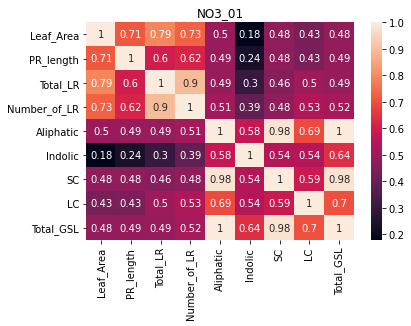

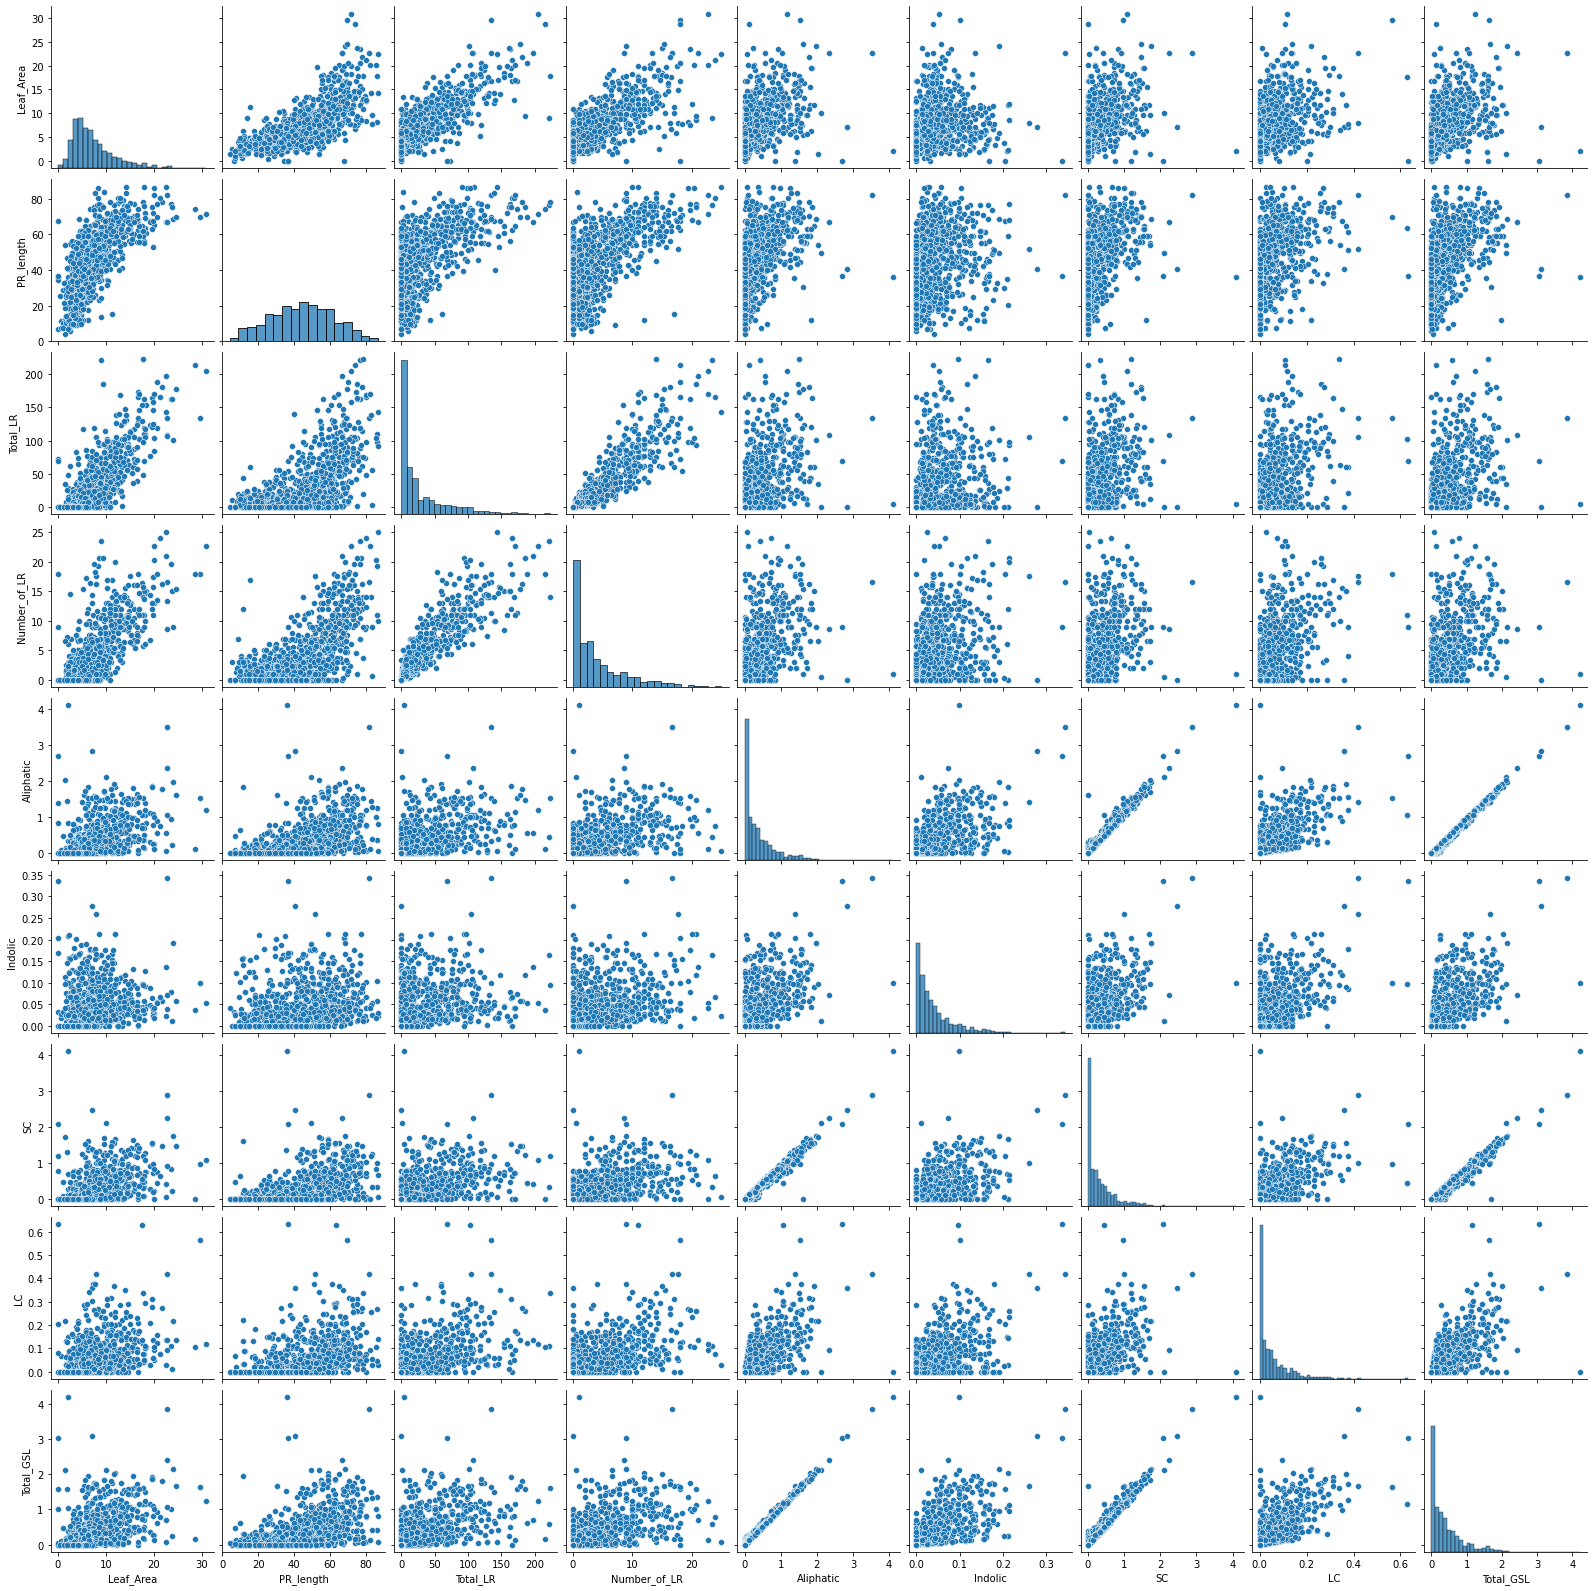

In [27]:
#I chose 7 phenotypes that I thought can nicely describe most of the "behaviours" of the plants, and I will continue to work 
#with those phenotypes.
#heatmaps between the traits:

sns.heatmap(NO3_01.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'SC', 'LC', 'Total_GSL']].corr(), annot=True)
ax = plt.axes()
ax.set_title('NO3_01')
plt.show()

sns.pairplot(NO3_01.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'SC', 'LC', 'Total_GSL']])
plt.show()
####I tried to change the colors of the variables in the scotterplots based on Seeds classification (hue='Seeds_classification')
####but it didn't work. Maybe because of the histograms? or because I have missing data in the seeds classification column?

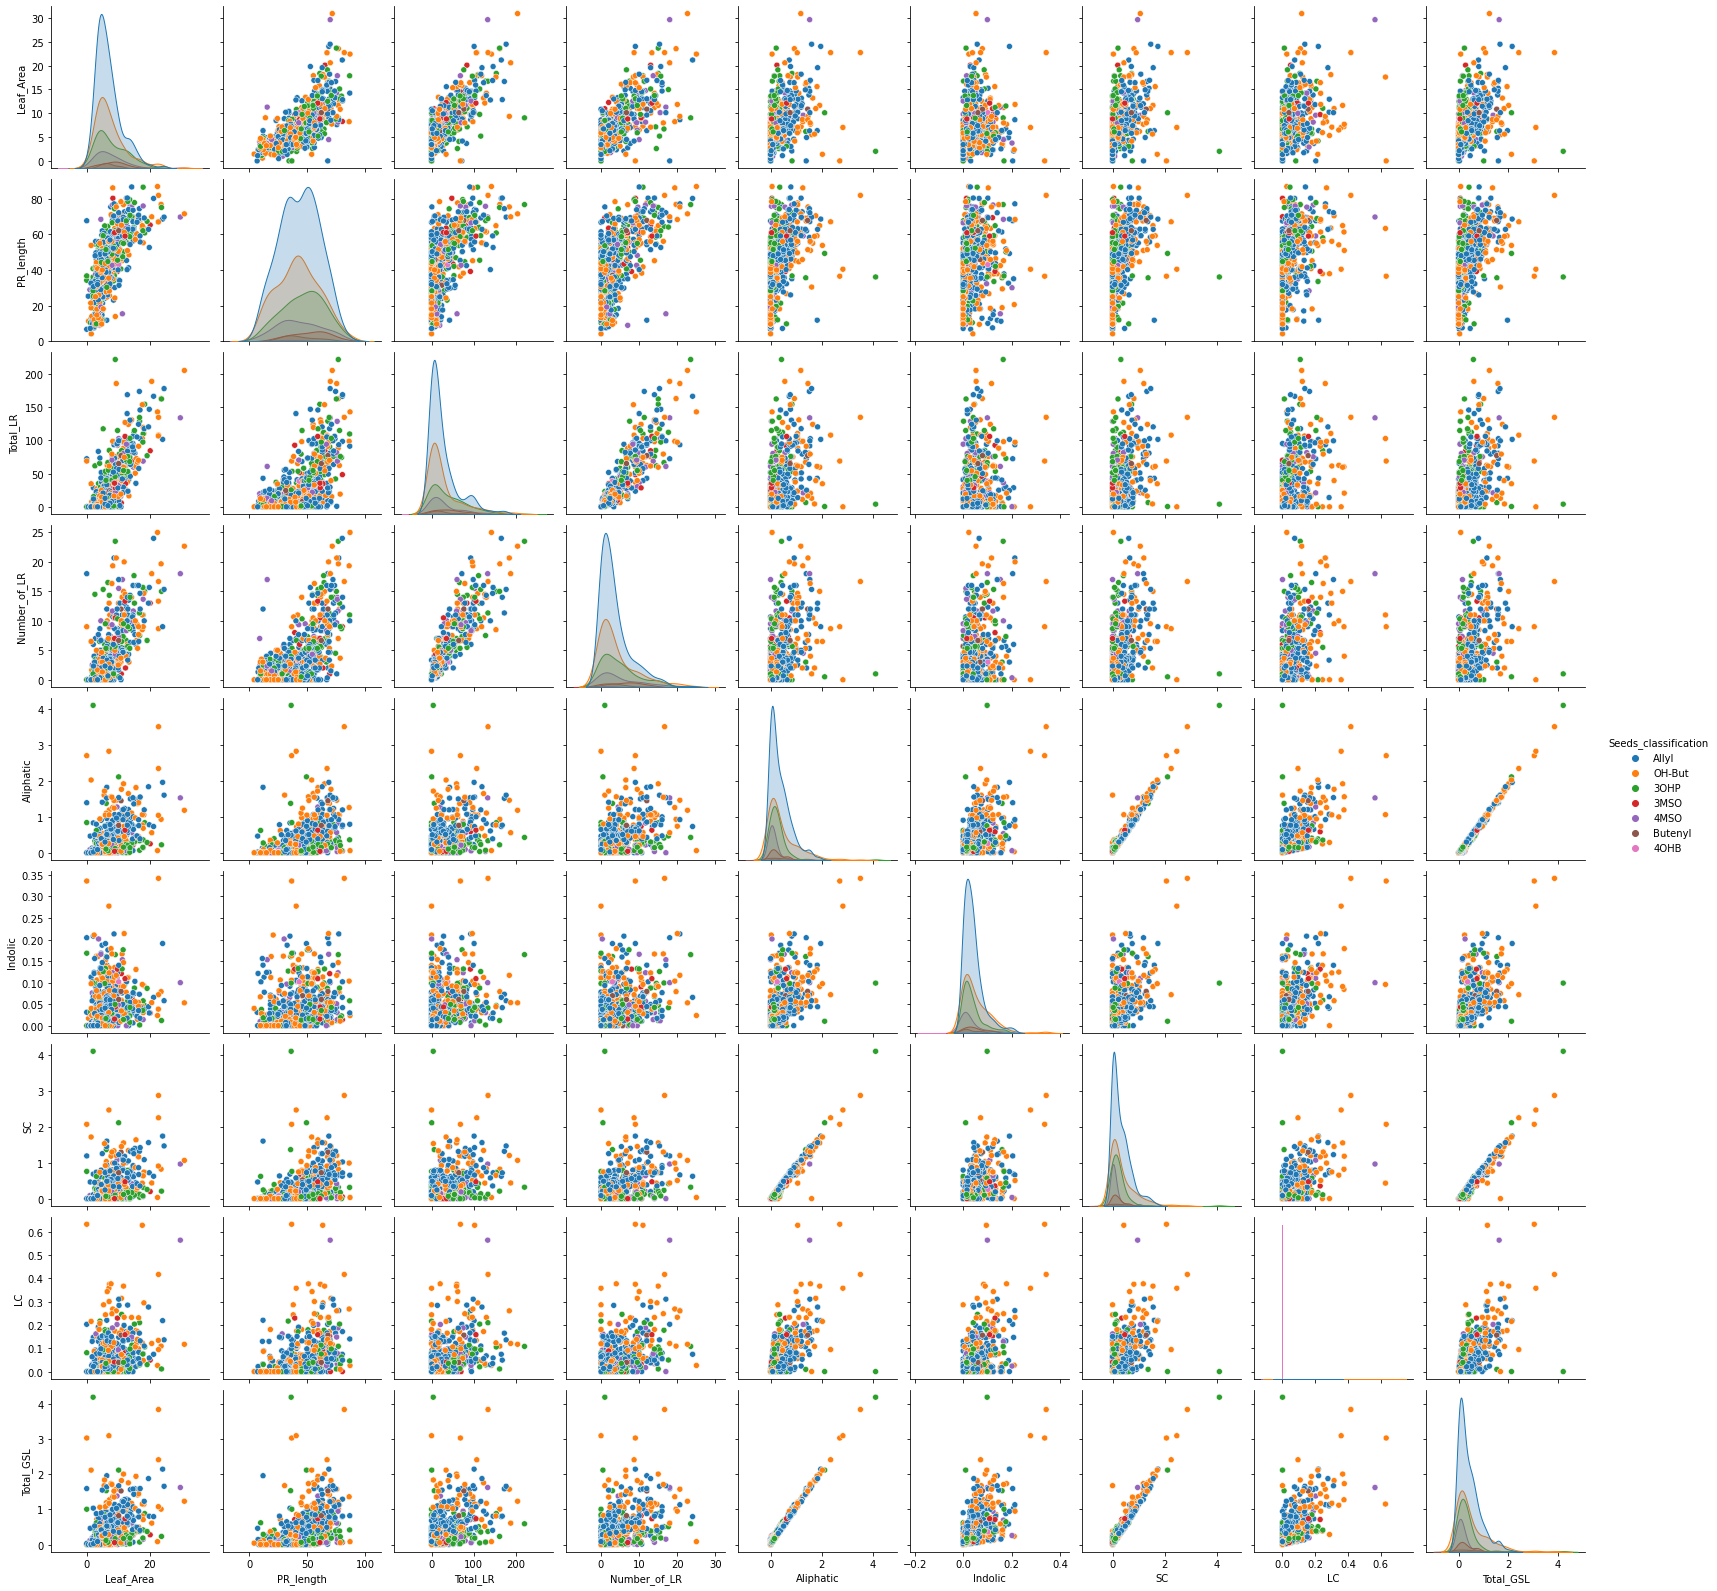

In [29]:
sns.pairplot(NO3_01.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'SC', 'LC', 'Total_GSL', 'Seeds_classification']], hue='Seeds_classification')

<ipython-input-123-833be6da2c28>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


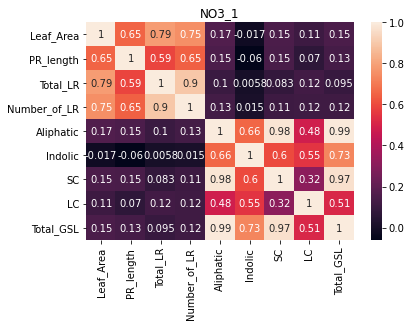

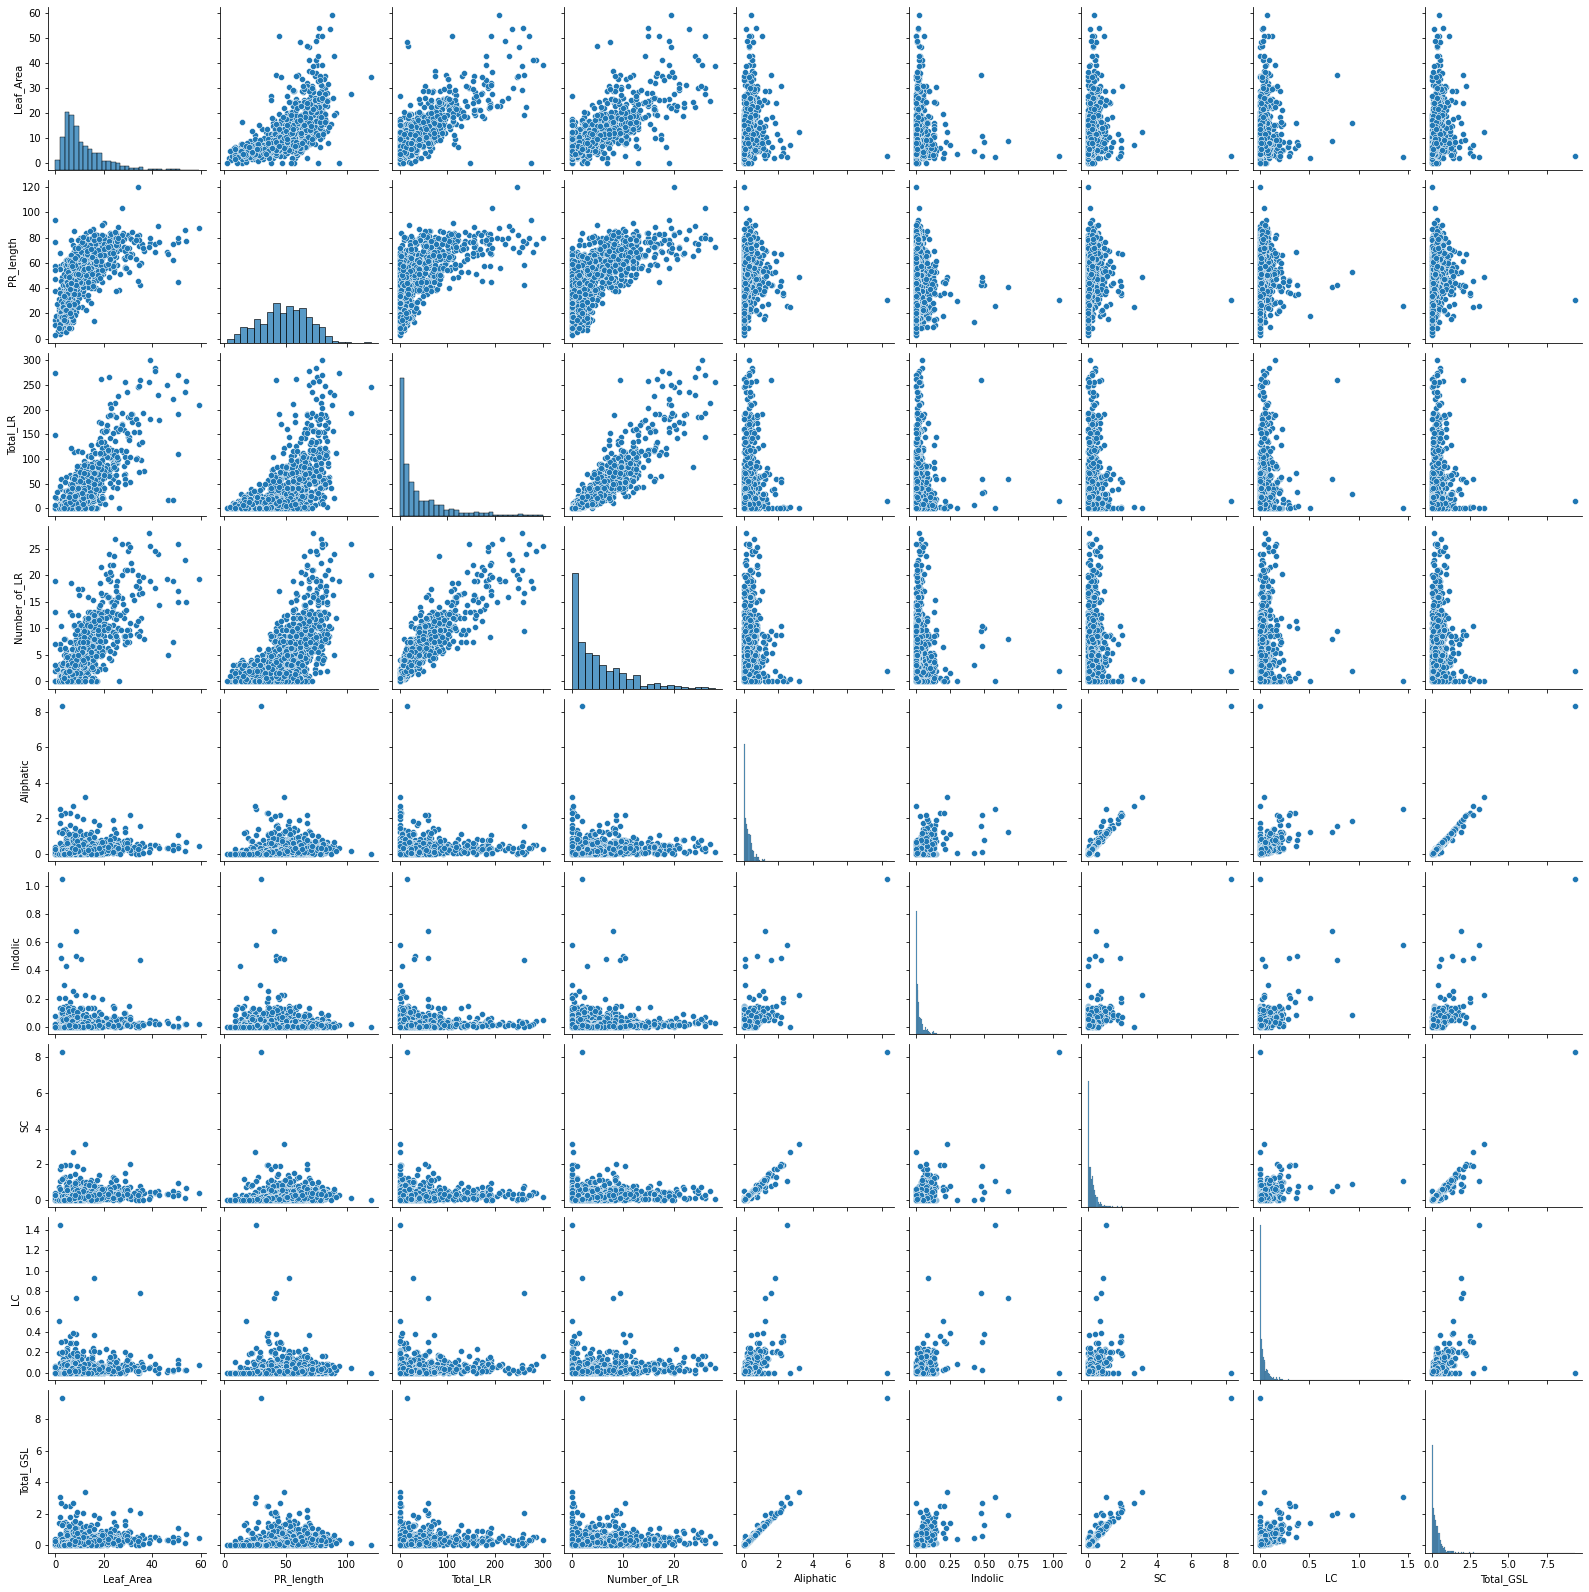

In [123]:
sns.heatmap(NO3_1.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'SC', 'LC', 'Total_GSL']].corr(), annot=True)
ax = plt.axes()
ax.set_title('NO3_1')
plt.show()

sns.pairplot(NO3_1.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'SC', 'LC', 'Total_GSL']])
plt.show()

<ipython-input-124-fa7d469141ca>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


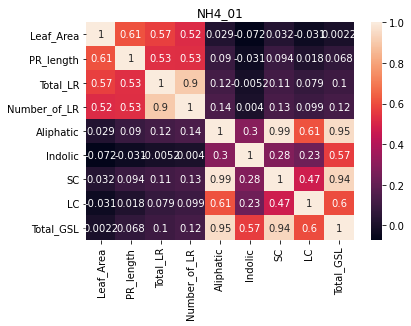

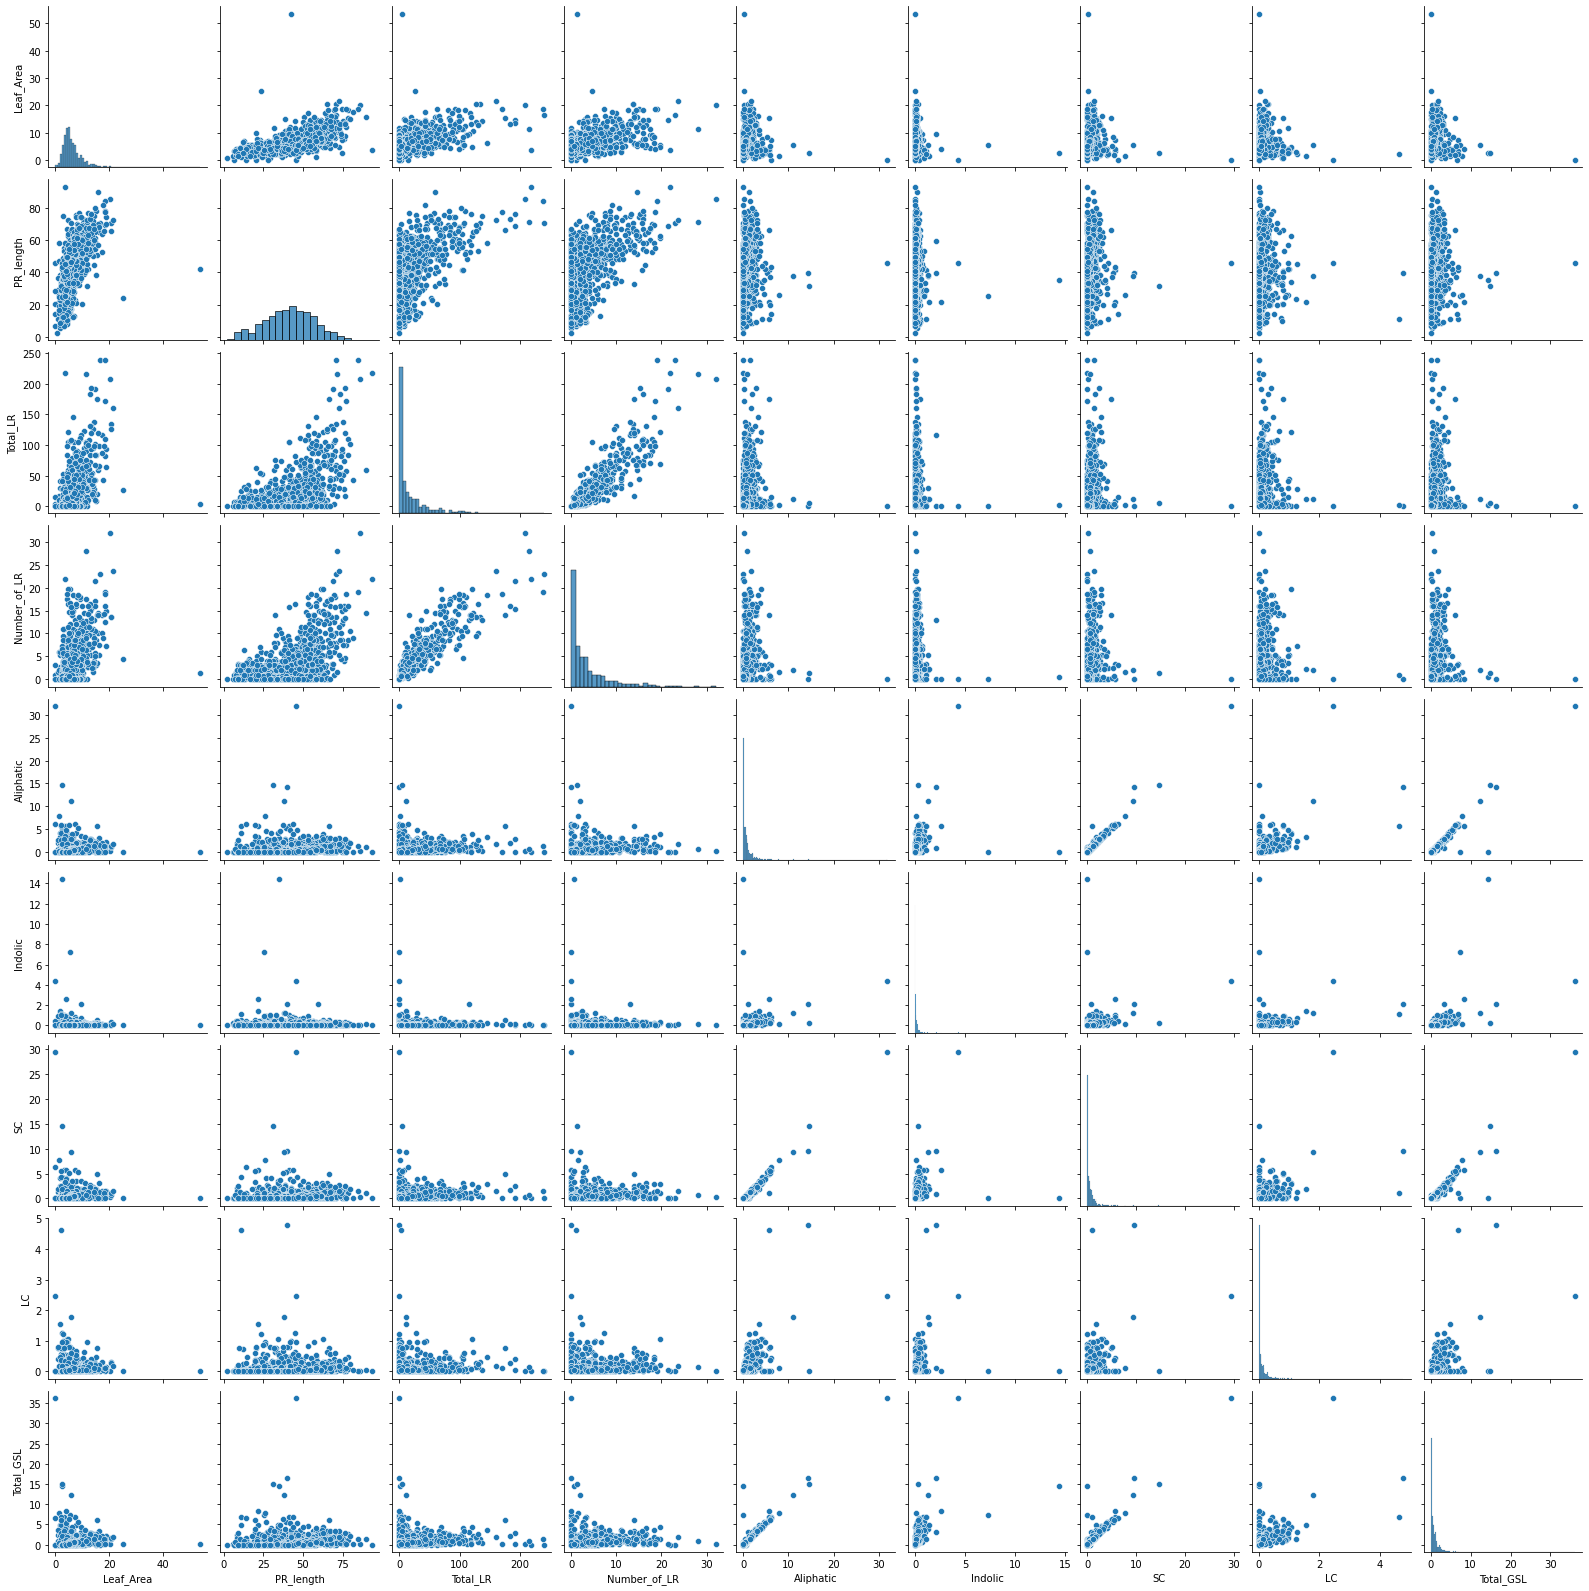

In [124]:
sns.heatmap(NH4_01.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'SC', 'LC', 'Total_GSL']].corr(), annot=True)
ax = plt.axes()
ax.set_title('NH4_01')
plt.show()

sns.pairplot(NH4_01.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'SC', 'LC', 'Total_GSL']])
plt.show()

<ipython-input-125-cdf1f1e79747>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


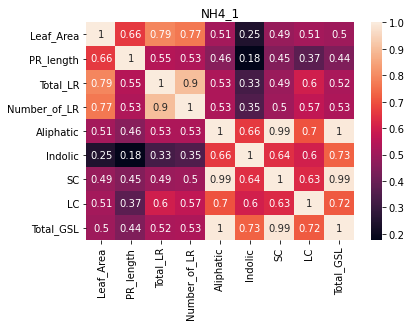

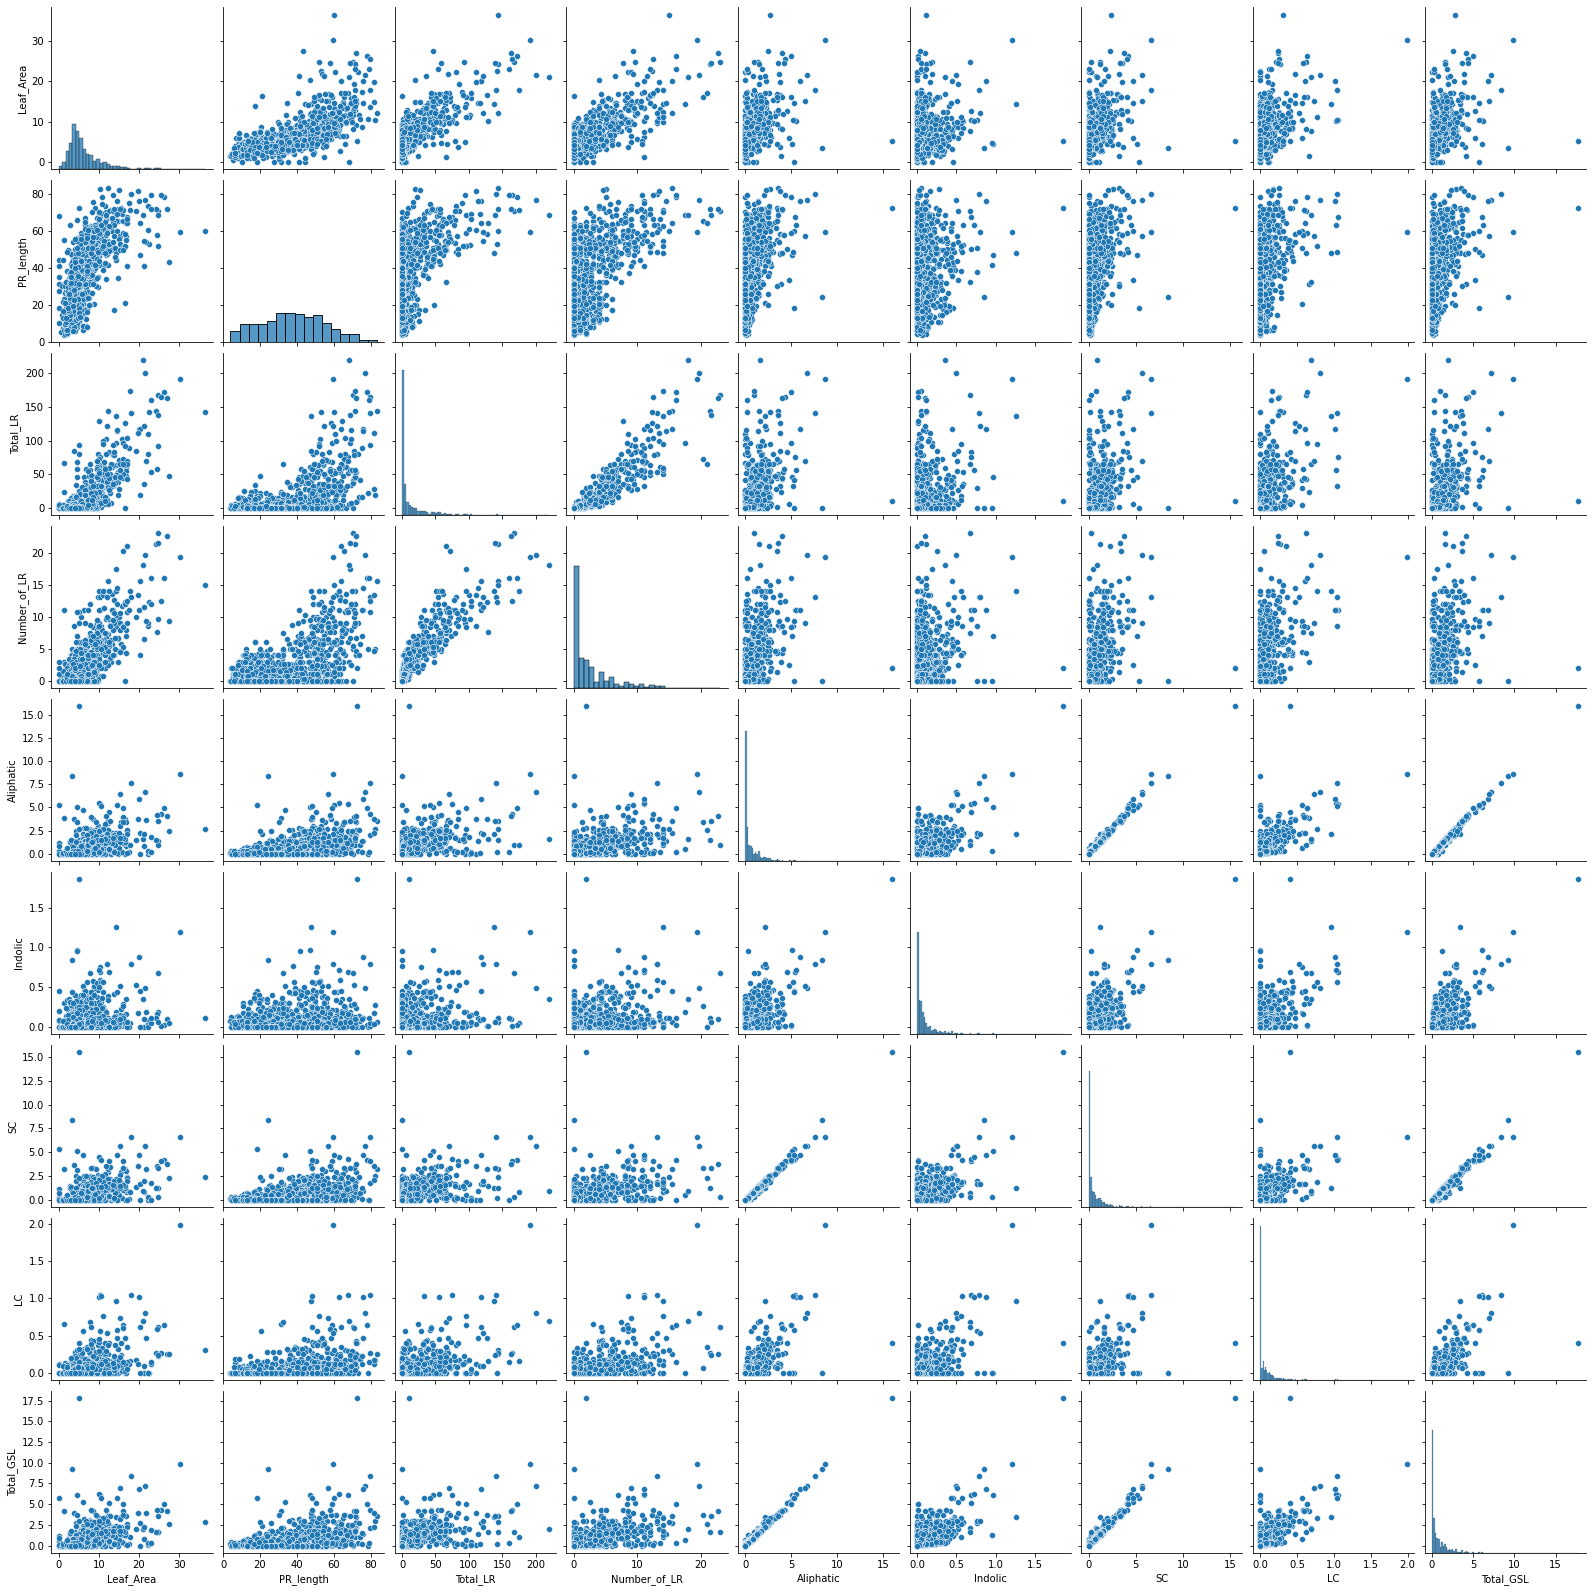

In [125]:
sns.heatmap(NH4_1.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'SC', 'LC', 'Total_GSL']].corr(), annot=True)
ax = plt.axes()
ax.set_title('NH4_1')
plt.show()

sns.pairplot(NH4_1.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'SC', 'LC', 'Total_GSL']])
plt.show()

__It looks like for all the nitrogen conditions there is a nice correlation between all the roots phenotypes, between the
Aliphatics and Total GSLs phenotypes, and between the total GSLs and the roots phenotypes. 
However, the 4 different nitrogen sources behave differently from each other.

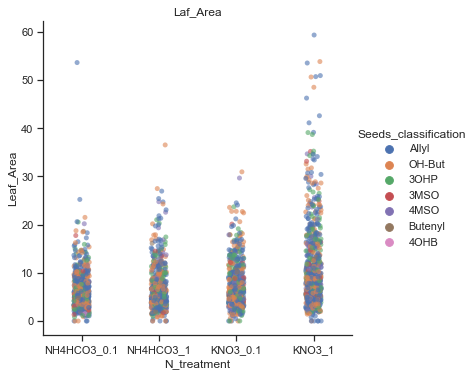

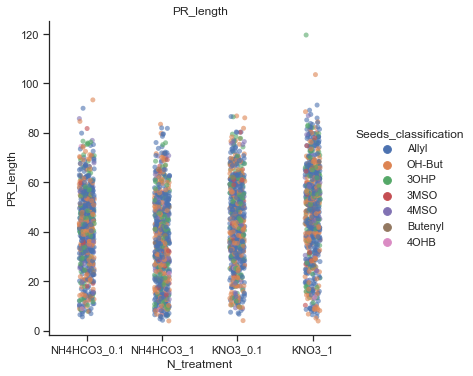

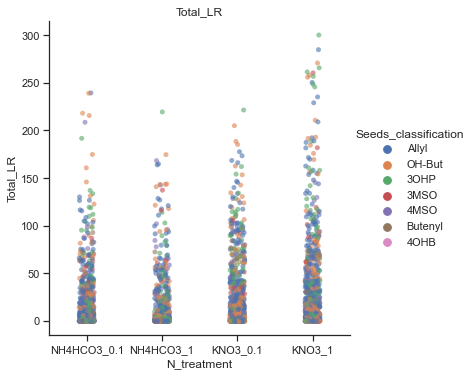

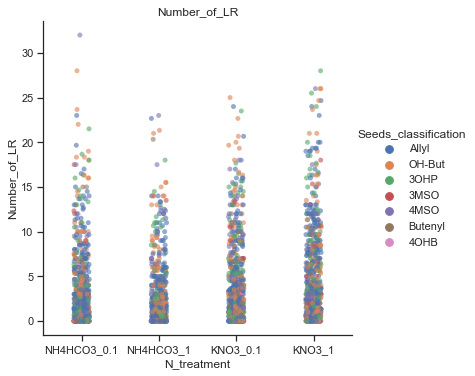

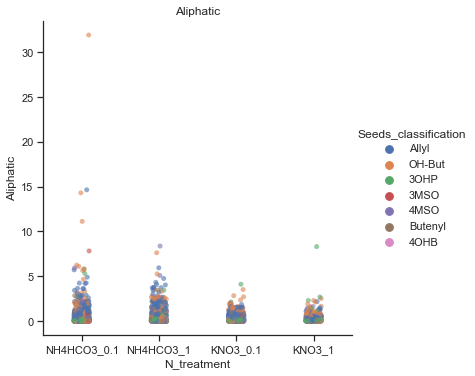

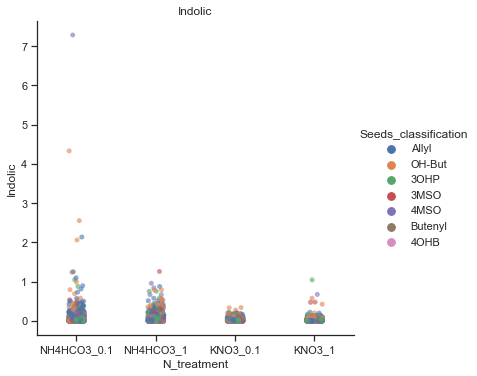

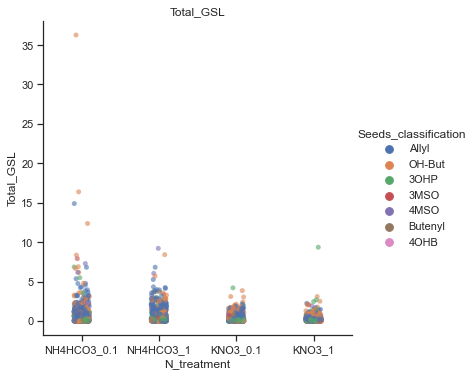

In [155]:
#Checking how the different phenotypes ditribute across the different nitrogen sources, and if there is some pattern in the 
#seeds classification:
sns.set_theme(style="ticks")
sns.catplot(x="N_treatment", y="Leaf_Area", hue="Seeds_classification",alpha=0.6, data=Data_2)
ax = plt.gca()
ax.set_title('Laf_Area')
plt.show()

sns.set_theme(style="ticks")
sns.catplot(x="N_treatment", y="PR_length", hue="Seeds_classification",alpha=0.6, data=Data_2)
ax = plt.gca()
ax.set_title('PR_length')
plt.show()

sns.set_theme(style="ticks")
sns.catplot(x="N_treatment", y="Total_LR", hue="Seeds_classification",alpha=0.6, data=Data_2)
ax = plt.gca()
ax.set_title('Total_LR')
plt.show()

sns.set_theme(style="ticks")
sns.catplot(x="N_treatment", y="Number_of_LR", hue="Seeds_classification",alpha=0.6, data=Data_2)
ax = plt.gca()
ax.set_title('Number_of_LR')
plt.show()

sns.set_theme(style="ticks")
sns.catplot(x="N_treatment", y="Aliphatic", hue="Seeds_classification",alpha=0.6, data=Data_2)
ax = plt.gca()
ax.set_title('Aliphatic')
plt.show()

sns.set_theme(style="ticks")
sns.catplot(x="N_treatment", y="Indolic", hue="Seeds_classification",alpha=0.6, data=Data_2)
ax = plt.gca()
ax.set_title('Indolic')
plt.show()

sns.set_theme(style="ticks")
sns.catplot(x="N_treatment", y="Total_GSL", hue="Seeds_classification",alpha=0.6, data=Data_2)
ax = plt.gca()
ax.set_title('Total_GSL')
plt.show()

In [ ]:
#Looks like the plants are "happier" the most on the NO3 1 medium.
#It doesn't look like there is any connection between seeds classification and any of the phenotypes.

<ipython-input-101-bb78a7788b53>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


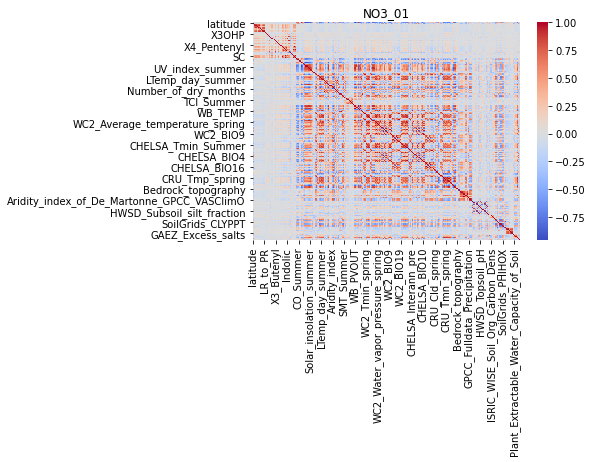

<ipython-input-101-bb78a7788b53>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


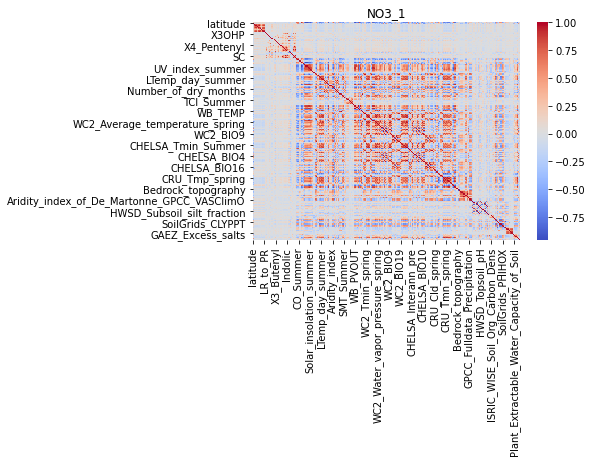

<ipython-input-101-bb78a7788b53>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


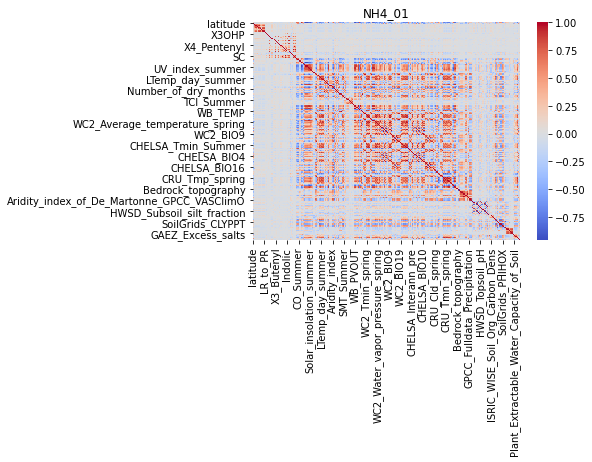

<ipython-input-101-bb78a7788b53>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


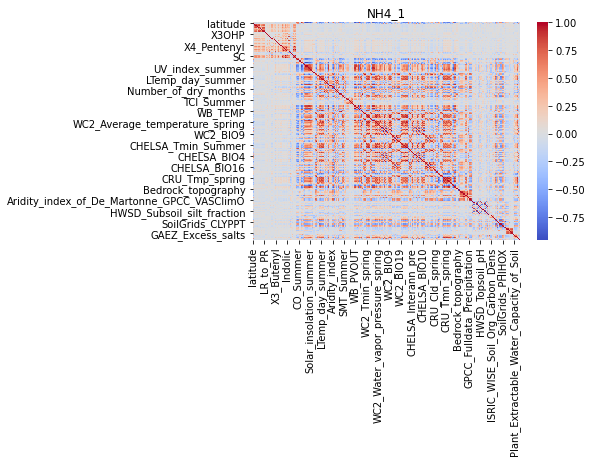

In [101]:
#I wanted to see if there is an obvious correlation between all the phenotypes and all the environmantal conditions:
sns.heatmap(NO3_01.corr(), cmap='coolwarm')
ax = plt.axes()
ax.set_title('NO3_01')
plt.show()

sns.heatmap(NO3_1.corr(), cmap='coolwarm')
ax = plt.axes()
ax.set_title('NO3_1')
plt.show()

sns.heatmap(NH4_01.corr(), cmap='coolwarm')
ax = plt.axes()
ax.set_title('NH4_01')
plt.show()

sns.heatmap(NH4_1.corr(), cmap='coolwarm')
ax = plt.axes()
ax.set_title('NH4_1')
plt.show()

In [96]:
#All the nitrogen treatments present pretty much the same pattern.
#Then I chose a few environmantal parameters to see if there is any correlation between the phenotypes and the environment:
print(NO3_01.iloc[:, 50:100].dtypes)

NO2_Spring                         float64
NO2_Summer                         float64
O3_Spring                          float64
O3_Summer                          float64
SIB3_carbon_flux_spring            float64
SIB3_carbon_flux_summer            float64
UV_index_spring                    float64
UV_index_summer                    float64
Solar_insolation_spring            float64
Solar_insolation_summer            float64
Net_radiation_spring               float64
Net_radiation_summer               float64
WATER_EQUIVALENT_ANOMALY_spring    float64
WATER_EQUIVALENT_ANOMALY_summer    float64
Rainfall_spring                    float64
Rainfall_summer                    float64
Precipitable_water_spring          float64
Precipitable_water_summer          float64
LTemp_day_spring                   float64
LTemp_day_summer                   float64
Ltemp__night_spring                float64
Ltemp__night_summer                float64
NDVI_Spring                        float64
NDVI_Summer

<ipython-input-126-9c46b3c82536>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


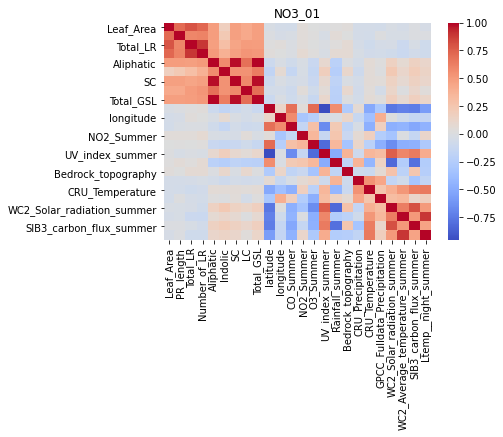

<ipython-input-126-9c46b3c82536>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


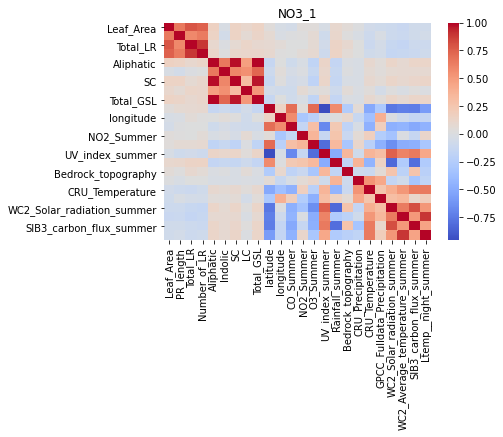

<ipython-input-126-9c46b3c82536>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


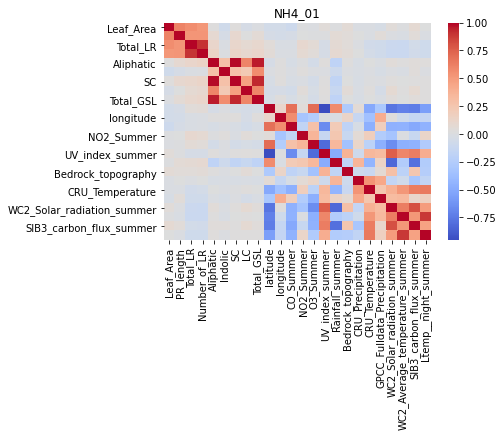

<ipython-input-126-9c46b3c82536>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


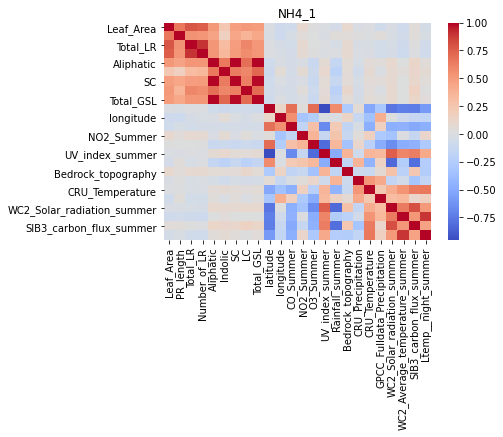

In [126]:
sns.heatmap(NO3_01.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'SC', 'LC', 'Total_GSL', 'latitude', 'longitude', 'group', 'CO_Summer', 'NO2_Summer', 'O3_Summer', 'UV_index_summer', 'Rainfall_summer', 'Bedrock_topography', 'CRU_Precipitation', 'CRU_Temperature', 'GPCC_Fulldata_Precipitation', 'WC2_Solar_radiation_summer', 'WC2_Average_temperature_summer', 'SIB3_carbon_flux_summer', 'Ltemp__night_summer']].corr(), cmap='coolwarm')
ax = plt.axes()
ax.set_title('NO3_01')
plt.show()

sns.heatmap(NO3_1.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'SC', 'LC', 'Total_GSL', 'latitude', 'longitude', 'group', 'CO_Summer', 'NO2_Summer', 'O3_Summer', 'UV_index_summer', 'Rainfall_summer', 'Bedrock_topography', 'CRU_Precipitation', 'CRU_Temperature', 'GPCC_Fulldata_Precipitation', 'WC2_Solar_radiation_summer', 'WC2_Average_temperature_summer', 'SIB3_carbon_flux_summer', 'Ltemp__night_summer']].corr(), cmap='coolwarm')
ax = plt.axes()
ax.set_title('NO3_1')
plt.show()

sns.heatmap(NH4_01.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'SC', 'LC', 'Total_GSL', 'latitude', 'longitude', 'group', 'CO_Summer', 'NO2_Summer', 'O3_Summer', 'UV_index_summer', 'Rainfall_summer', 'Bedrock_topography', 'CRU_Precipitation', 'CRU_Temperature', 'GPCC_Fulldata_Precipitation', 'WC2_Solar_radiation_summer', 'WC2_Average_temperature_summer', 'SIB3_carbon_flux_summer', 'Ltemp__night_summer']].corr(), cmap='coolwarm')
ax = plt.axes()
ax.set_title('NH4_01')
plt.show()

sns.heatmap(NH4_1.loc[:,['Leaf_Area', 'PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'SC', 'LC', 'Total_GSL', 'latitude',
                         'longitude', 'group', 'CO_Summer', 'NO2_Summer', 'O3_Summer', 'UV_index_summer', 'Rainfall_summer', 
                         'Bedrock_topography', 'CRU_Precipitation', 'CRU_Temperature', 'GPCC_Fulldata_Precipitation', 
                         'WC2_Solar_radiation_summer', 'WC2_Average_temperature_summer', 'SIB3_carbon_flux_summer', 
                         'Ltemp__night_summer']].corr(), cmap='coolwarm')
ax = plt.axes()
ax.set_title('NH4_1')
plt.show()

In [ ]:
#There are different correlations between the GSLs phenotypes and the roots phenotypes between the 4 different nitrogen sources.
#For all the treatments it looks like there is some correlation between total GSLs and the leaf/roots phenotypes.
#The only environmental parameter that seems to correlate with the phenotype is the "Rainfall_summer". 

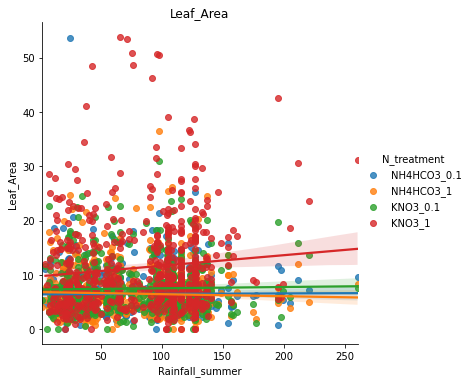

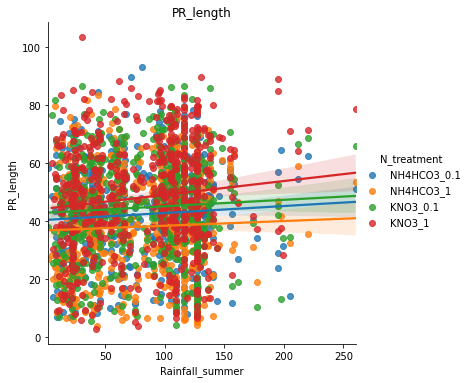

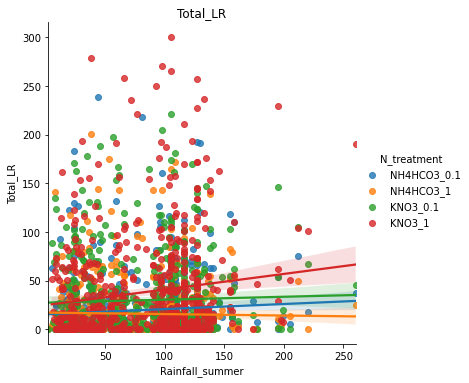

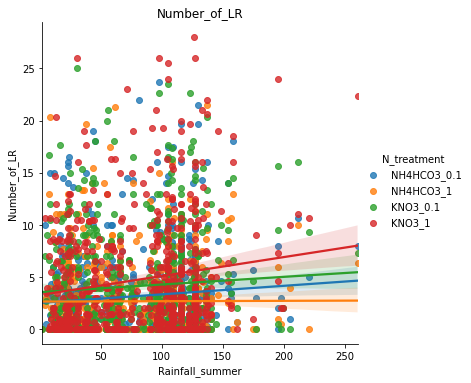

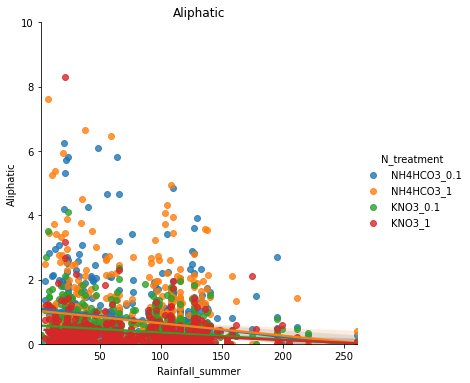

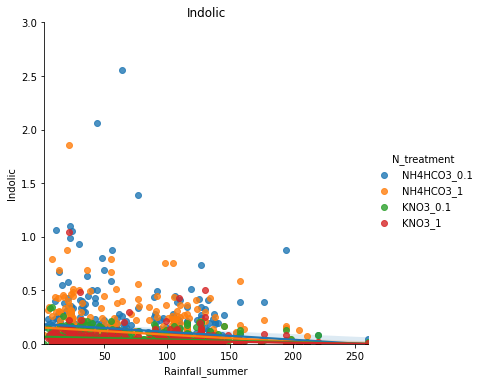

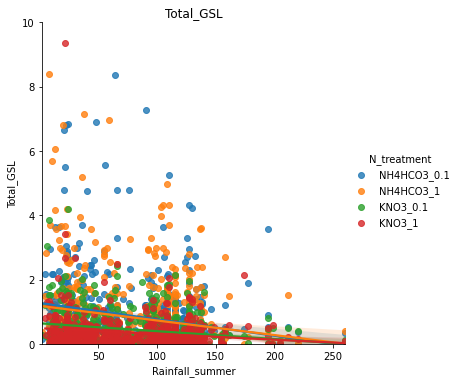

In [145]:
#I'll check how the correlation between Rainfall_summer and the phenotypes look like:
#I limitted some of the y axis to avoid outliers
sns.lmplot(x="Rainfall_summer", y="Leaf_Area", hue="N_treatment", data=Data_2)
ax = plt.gca()
ax.set_title("Leaf_Area")
plt.show()

sns.lmplot(x="Rainfall_summer", y="PR_length", hue="N_treatment", data=Data_2)
ax = plt.gca()
ax.set_title("PR_length")
plt.show()

sns.lmplot(x="Rainfall_summer", y="Total_LR", hue="N_treatment", data=Data_2)
ax = plt.gca()
ax.set_title("Total_LR")
plt.show()

sns.lmplot(x="Rainfall_summer", y="Number_of_LR", hue="N_treatment", data=Data_2)
ax = plt.gca()
ax.set_title("Number_of_LR")
plt.show()

sns.lmplot(x="Rainfall_summer", y="Aliphatic", hue="N_treatment", data=Data_2)
plt.ylim(0, 10)
ax = plt.gca()
ax.set_title("Aliphatic")
plt.show()

sns.lmplot(x="Rainfall_summer", y="Indolic", hue="N_treatment", data=Data_2)
plt.ylim(0, 3)
ax = plt.gca()
ax.set_title("Indolic")
plt.show()

sns.lmplot(x="Rainfall_summer", y="Total_GSL", hue="N_treatment", data=Data_2)
plt.ylim(0, 10)
ax = plt.gca()
ax.set_title("Total_GSL")
plt.show()

In [ ]:
#Overall, it looks like the plants are "happier" on NO3_1, as they have bigger laeves and more roots. 
#Most of the plants prefer rainfall values up to 150 mm in the summer.

In [175]:
#Model the connection between Leaf area and Rainfall, just  for one nitrogen treatment:

#Creating now dataset with no NAs:
NO3_01_a = NO3_01.dropna(subset=['Leaf_Area', 'Rainfall_summer'])

X = NO3_01_a[["Rainfall_summer"]] 
Y = NO3_01_a[["Leaf_Area"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)
print("Evaluation of NO3_01 model: ", rModel.score(X_train, Y_train))

Evaluation of NO3_01 model:  2.614432623060381e-05


In [176]:
#Same, but for NO3_1:
NO3_1_a = NO3_1.dropna(subset=['Leaf_Area', 'Rainfall_summer'])

X = NO3_1_a[["Rainfall_summer"]] 
Y = NO3_1_a[["Leaf_Area"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)
print("Evaluation of NO3_1 model: ", rModel.score(X_train, Y_train))

Evaluation of NO3_1 model:  0.00801357271396086


In [177]:
#Same, but for NH4_01:
NH4_01_a = NH4_01.dropna(subset=['Leaf_Area', 'Rainfall_summer'])

X = NH4_01_a[["Rainfall_summer"]] 
Y = NH4_01_a[["Leaf_Area"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)
print("Evaluation of NH4_01 model: ", rModel.score(X_train, Y_train))

Evaluation of NH4_01 model:  6.231622195496112e-05


In [178]:
#Same, but for NH4_1:
NH4_1_a = NH4_1.dropna(subset=['Leaf_Area', 'Rainfall_summer'])

X = NH4_1_a[["Rainfall_summer"]] 
Y = NH4_1_a[["Leaf_Area"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)
print("Evaluation of NH4_1 model: ", rModel.score(X_train, Y_train))

Evaluation of NH4_1 model:  0.0025366709122393027


In [167]:
#Tese are horible models. A bit better for the higher concentrations, but still not good enough.
#I'll try a different one:

X = NO3_01_a[["Rainfall_summer"]] 
X = sm.add_constant(X)

Y = NO3_01_a[["Leaf_Area"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel2 = sm.OLS(Y_train, X_train)

rModel2_results = rModel2.fit()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Leaf_Area   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01153
Date:                Sun, 26 Sep 2021   Prob (F-statistic):              0.915
Time:                        12:34:05   Log-Likelihood:                -1287.0
No. Observations:                 443   AIC:                             2578.
Df Residuals:                     441   BIC:                             2586.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.3697      0.431     17.091      0.000       6.522       8.217
Rainfall_summer     0.0005      0.005      0.107      0.915      -0.009       0.010
==============================================================================
Omnibus:                      122.786   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.701
Skew:                           1.412   Prob(JB):                     9.14e-63
Kurtosis:                       5.739   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
#Again, for NO3_1:

X = NO3_1_a[["Rainfall_summer"]] 
X = sm.add_constant(X)

Y = NO3_1_a[["Leaf_Area"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel2 = sm.OLS(Y_train, X_train)

rModel2_results = rModel2.fit()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Leaf_Area   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.595
Date:                Sun, 26 Sep 2021   Prob (F-statistic):             0.0586
Time:                        12:41:38   Log-Likelihood:                -1620.0
No. Observations:                 447   AIC:                             3244.
Df Residuals:                     445   BIC:                             3252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.9598      0.883     11.277      0.000       8.224      11.696
Rainfall_summer     0.0178      0.009      1.896      0.059      -0.001       0.036
==============================================================================
Omnibus:                      201.435   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.252
Skew:                           2.039   Prob(JB):                    1.90e-181
Kurtosis:                       8.297   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
#Again, for NH4_01:

X = NH4_01_a[["Rainfall_summer"]] 
X = sm.add_constant(X)

Y = NH4_01_a[["Leaf_Area"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel2 = sm.OLS(Y_train, X_train)

rModel2_results = rModel2.fit()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Leaf_Area   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.02755
Date:                Sun, 26 Sep 2021   Prob (F-statistic):              0.868
Time:                        12:42:00   Log-Likelihood:                -1272.2
No. Observations:                 444   AIC:                             2548.
Df Residuals:                     442   BIC:                             2557.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.5330      0.413     15.836      0.000       5.722       7.344
Rainfall_summer     0.0007      0.004      0.166      0.868      -0.008       0.009
==============================================================================
Omnibus:                      424.923   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22431.575
Skew:                           3.940   Prob(JB):                         0.00
Kurtosis:                      36.918   Cond. No.                         191.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
#Again, for NH4_1:

X = NH4_1_a[["Rainfall_summer"]] 
X = sm.add_constant(X)

Y = NH4_1_a[["Leaf_Area"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel2 = sm.OLS(Y_train, X_train)

rModel2_results = rModel2.fit()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Leaf_Area   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.124
Date:                Sun, 26 Sep 2021   Prob (F-statistic):              0.290
Time:                        12:42:15   Log-Likelihood:                -1289.5
No. Observations:                 444   AIC:                             2583.
Df Residuals:                     442   BIC:                             2591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.0009      0.431     16.245      0.000       6.154       7.848
Rainfall_summer    -0.0051      0.005     -1.060      0.290      -0.014       0.004
==============================================================================
Omnibus:                      227.882   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1382.409
Skew:                           2.189   Prob(JB):                    6.51e-301
Kurtosis:                      10.454   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
#Again, horrible R squared across all the nitrogen treatments. 
#Looks like "Rainfall_Summer" is not a good parameter.
#I'll try to check the correlation between rainfall in the summer and total GSL:
#Both of the models were very similar, so I'll try only one:

In [186]:
#NO3_01
NO3_01_a = NO3_01.dropna(subset=['Total_GSL', 'Rainfall_summer'])

X = NO3_01_a[["Rainfall_summer"]] 
Y = NO3_01_a[["Total_GSL"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)
print("Evaluation of NO3_01 model: ", rModel.score(X_train, Y_train))

Evaluation of NO3_01 model:  0.0369879563086023


In [187]:
#NO3_1
NO3_1_a = NO3_1.dropna(subset=['Total_GSL', 'Rainfall_summer'])

X = NO3_1_a[["Rainfall_summer"]] 
Y = NO3_1_a[["Total_GSL"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)
print("Evaluation of NO3_1 model: ", rModel.score(X_train, Y_train))

Evaluation of NO3_1 model:  0.028383693532680665


In [188]:
#NH4_01
NH4_01_a = NH4_01.dropna(subset=['Total_GSL', 'Rainfall_summer'])

X = NH4_01_a[["Rainfall_summer"]] 
Y = NH4_01_a[["Total_GSL"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)
print("Evaluation of NH4_01 model: ", rModel.score(X_train, Y_train))

Evaluation of NH4_01 model:  0.030074495916112665


In [189]:
#NH4_1
NH4_1_a = NH4_1.dropna(subset=['Total_GSL', 'Rainfall_summer'])

X = NH4_1_a[["Rainfall_summer"]] 
Y = NH4_1_a[["Total_GSL"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)
print("Evaluation of NH4_1 model: ", rModel.score(X_train, Y_train))

Evaluation of NH4_1 model:  0.028676637509376435


In [ ]:
#There is a better correlation between rainfall and total GSLs then between rainfall and leaf area, but the correlation 
#is still not good enough.
#I'll work on the correlation between total GSL and leaf area/pr root

In [190]:
#For NO3_01:
NO3_01_a = NO3_01.dropna(subset=['Leaf_Area', 'Total_GSL'])

X = NO3_01_a[["Total_GSL"]] 
Y = NO3_01_a[["Leaf_Area"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)
print("Evaluation of NO3_01 model: ", rModel.score(X_train, Y_train))

Evaluation of NO3_01 model:  0.2134724660772579


In [191]:
#Same, but for NO3_1:
NO3_1_a = NO3_1.dropna(subset=['Leaf_Area', 'Total_GSL'])

X = NO3_1_a[["Total_GSL"]] 
Y = NO3_1_a[["Leaf_Area"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)
print("Evaluation of NO3_1 model: ", rModel.score(X_train, Y_train))

Evaluation of NO3_1 model:  0.017689713164210752


In [192]:
#Same, but for NH4_01:
NH4_01_a = NH4_01.dropna(subset=['Leaf_Area', 'Total_GSL'])

X = NH4_01_a[["Total_GSL"]] 
Y = NH4_01_a[["Leaf_Area"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)
print("Evaluation of NH4_01 model: ", rModel.score(X_train, Y_train))

Evaluation of NH4_01 model:  0.004045083621052714


In [193]:
#Same, but for NH4_1:
NH4_1_a = NH4_1.dropna(subset=['Leaf_Area', 'Total_GSL'])

X = NH4_1_a[["Total_GSL"]] 
Y = NH4_1_a[["Leaf_Area"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)
print("Evaluation of NH4_1 model: ", rModel.score(X_train, Y_train))

Evaluation of NH4_1 model:  0.2722717100840111


In [194]:
#And between total GSLs and pr length:
#For NO3_01:
NO3_01_a = NO3_01.dropna(subset=['PR_length', 'Total_GSL'])

X = NO3_01_a[["Total_GSL"]] 
Y = NO3_01_a[["PR_length"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)
print("Evaluation of NO3_01 model: ", rModel.score(X_train, Y_train))

Evaluation of NO3_01 model:  0.22592469900453038


In [195]:
#For NO3_1:
NO3_1_a = NO3_1.dropna(subset=['PR_length', 'Total_GSL'])

X = NO3_1_a[["Total_GSL"]] 
Y = NO3_1_a[["PR_length"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)
print("Evaluation of NO3_1 model: ", rModel.score(X_train, Y_train))

Evaluation of NO3_1 model:  0.017054998493172824


In [196]:
#For NH4_01:
NH4_01_a = NH4_01.dropna(subset=['PR_length', 'Total_GSL'])

X = NH4_01_a[["Total_GSL"]] 
Y = NH4_01_a[["PR_length"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)
print("Evaluation of NH4_01 model: ", rModel.score(X_train, Y_train))

Evaluation of NH4_01 model:  0.0030452597759823563


In [197]:
#For NH4_1:
NH4_1_a = NH4_1.dropna(subset=['PR_length', 'Total_GSL'])

X = NH4_1_a[["Total_GSL"]] 
Y = NH4_1_a[["PR_length"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)
print("Evaluation of NH4_1 model: ", rModel.score(X_train, Y_train))

Evaluation of NH4_1 model:  0.2153772647575809


In [198]:
#Trying the second model:
X = NH4_1_a[["Total_GSL"]] 
X = sm.add_constant(X)

Y = NH4_1_a[["PR_length"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel2 = sm.OLS(Y_train, X_train)

rModel2_results = rModel2.fit()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PR_length   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     198.7
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           4.68e-40
Time:                        12:53:51   Log-Likelihood:                -3014.6
No. Observations:                 726   AIC:                             6033.
Df Residuals:                     724   BIC:                             6042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.7609      0.684     47.901      0.000      31.418      34.104
Total_GSL      6.9681      0.494     14.097      0.000       5.998       7.939
==============================================================================
Omnibus:                        2.116   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                2.021
Skew:                          -0.128   Prob(JB):                        0.364
Kurtosis:                       3.037   Cond. No.                         2.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#All the models for all the nitrogen treatments present medium results...
#The best model is for:
#NO3_01: Total GSLs and Leaf Area
#NH4_1: Total GSLs and Leaf Area
#NO3_01: Total GSLs and PR length
#NH4_1: Total GSLs and PR length

Text(0, 0.5, 'Y prediction')

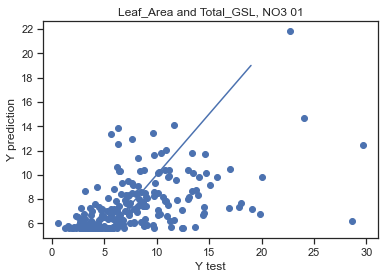

In [209]:
#NO3_01: Total GSLs and Leaf area

NO3_01_a = NO3_01.dropna(subset=['Leaf_Area', 'Total_GSL'])

X = NO3_01_a[["Total_GSL"]] 
Y = NO3_01_a[["Leaf_Area"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)

Y_pred = rModel.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.plot([x for x in range(6,20)],[x for x in range(6,20)])
plt.title('Leaf_Area and Total_GSL, NO3 01')
plt.xlabel('Y test')
plt.ylabel('Y prediction')

Text(0, 0.5, 'Y prediction')

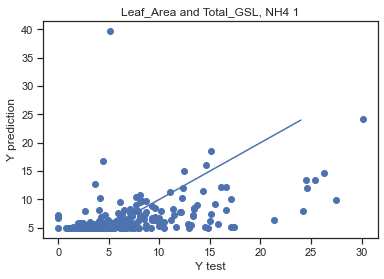

In [210]:
#NH4_1: Total GSLs and Leaf area

NH4_1_a = NH4_1.dropna(subset=['Leaf_Area', 'Total_GSL'])

X = NH4_1_a[["Total_GSL"]] 
Y = NH4_1_a[["Leaf_Area"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)

Y_pred = rModel.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.plot([x for x in range(6,25)],[x for x in range(6,25)])
plt.title('Leaf_Area and Total_GSL, NH4 1')
plt.xlabel('Y test')
plt.ylabel('Y prediction')

Text(0, 0.5, 'Y prediction')

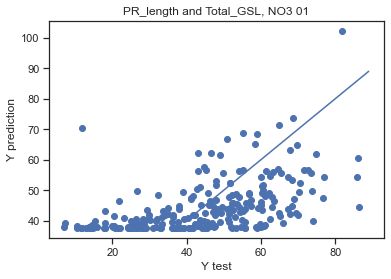

In [211]:
#NO3_01: Total GSLs and PR length

NO3_01_a = NO3_01.dropna(subset=['PR_length', 'Total_GSL'])

X = NO3_01_a[["Total_GSL"]] 
Y = NO3_01_a[["PR_length"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)

Y_pred = rModel.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.plot([x for x in range(40,90)],[x for x in range(40,90)])
plt.title('PR_length and Total_GSL, NO3 01')
plt.xlabel('Y test')
plt.ylabel('Y prediction')

Text(0, 0.5, 'Y prediction')

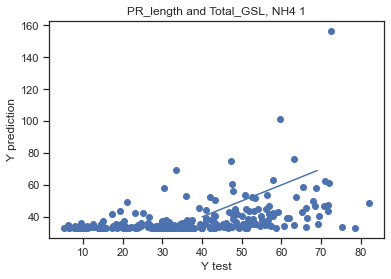

In [212]:
#NH4_1: Total GSLs and PR length

NH4_1_a = NH4_1.dropna(subset=['PR_length', 'Total_GSL'])

X = NH4_1_a[["Total_GSL"]] 
Y = NH4_1_a[["PR_length"]]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, Y_train)

Y_pred = rModel.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.plot([x for x in range(40,70)],[x for x in range(40,70)])
plt.title('PR_length and Total_GSL, NH4 1')
plt.xlabel('Y test')
plt.ylabel('Y prediction')

In [ ]:
#To summerize:
#Two nitrogen treatments present nice, but not perfect, correlations between total GSLs and leaf area, and between total 
#GSLs and pr length.
#These treatments are NH4 1, and NO3 01. 

#The next step is to include these 3 peremeters together in one model:

In [221]:
#NO3 01:
NO3_01_a = NO3_01.dropna(subset=['PR_length', 'Total_GSL', 'Leaf_Area'])
X = NO3_01_a[['PR_length', 'Leaf_Area']]

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
Y = NO3_01_a[['Total_GSL']]
# Split the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = sm.OLS(Y_train, X_train)

rModel_results = rModel.fit()

print(rModel_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Total_GSL   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     73.60
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           1.41e-38
Time:                        14:02:41   Log-Likelihood:                -214.68
No. Observations:                 443   AIC:                             437.4
Df Residuals:                     439   BIC:                             453.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0301      0.061     

In [220]:
#NH4 1:
NH4_1_a = NH4_1.dropna(subset=['PR_length', 'Total_GSL', 'Leaf_Area'])
X = NH4_1_a[['PR_length', 'Leaf_Area']]

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
Y = NH4_1_a[['Total_GSL']]
# Split the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = sm.OLS(Y_train, X_train)

rModel_results = rModel.fit()

print(rModel_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Total_GSL   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     58.38
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           8.65e-32
Time:                        14:02:20   Log-Likelihood:                -695.61
No. Observations:                 444   AIC:                             1399.
Df Residuals:                     440   BIC:                             1416.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1364      0.157     

In [ ]:
#Adding the 'Rainfall_summer' to the models:

In [222]:
#NO3 01:
NO3_01_a = NO3_01.dropna(subset=['PR_length', 'Total_GSL', 'Leaf_Area', 'Rainfall_summer'])
X = NO3_01_a[['PR_length', 'Leaf_Area', 'Rainfall_summer']]

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
Y = NO3_01_a[['Total_GSL']]
# Split the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = sm.OLS(Y_train, X_train)

rModel_results = rModel.fit()

print(rModel_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Total_GSL   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     73.60
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           1.41e-38
Time:                        14:03:31   Log-Likelihood:                -214.68
No. Observations:                 443   AIC:                             437.4
Df Residuals:                     439   BIC:                             453.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0301      0.061     

In [223]:
#NH4 1:
NH4_1_a = NH4_1.dropna(subset=['PR_length', 'Total_GSL', 'Leaf_Area', 'Rainfall_summer'])
X = NH4_1_a[['PR_length', 'Leaf_Area', 'Rainfall_summer']]

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
Y = NH4_1_a[['Total_GSL']]
# Split the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = sm.OLS(Y_train, X_train)

rModel_results = rModel.fit()

print(rModel_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Total_GSL   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     58.38
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           8.65e-32
Time:                        14:03:54   Log-Likelihood:                -695.61
No. Observations:                 444   AIC:                             1399.
Df Residuals:                     440   BIC:                             1416.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1364      0.157     

In [ ]:
#Adding 'Rainfall_summer' improved NO# 01 model, but not NH4 1 model.

In [228]:
#Adding specific location ('longitude' and 'latitude') slightly improved the model:
#NO3 01:
NO3_01_a = NO3_01.dropna(subset=['PR_length', 'Total_GSL', 'Leaf_Area', 'Rainfall_summer', 'longitude', 'latitude'])
X = NO3_01_a[['PR_length', 'Leaf_Area', 'Rainfall_summer', 'longitude', 'latitude']]

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
Y = NO3_01_a[['Total_GSL']]
# Split the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = sm.OLS(Y_train, X_train)

rModel_results = rModel.fit()

print(rModel_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Total_GSL   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     44.65
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           3.37e-37
Time:                        14:08:10   Log-Likelihood:                -213.52
No. Observations:                 443   AIC:                             439.0
Df Residuals:                     437   BIC:                             463.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3875      0.247     

In [227]:
#Adding specific location ('longitude' and 'latitude') improved the model:
#NH4 1:
NH4_1_a = NH4_1.dropna(subset=['PR_length', 'Total_GSL', 'Leaf_Area', 'Rainfall_summer', 'longitude', 'latitude'])
X = NH4_1_a[['PR_length', 'Leaf_Area', 'Rainfall_summer', 'longitude', 'latitude']]

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
Y = NH4_1_a[['Total_GSL']]
# Split the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = sm.OLS(Y_train, X_train)

rModel_results = rModel.fit()

print(rModel_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Total_GSL   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     37.40
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           6.31e-32
Time:                        14:06:42   Log-Likelihood:                -691.08
No. Observations:                 444   AIC:                             1394.
Df Residuals:                     438   BIC:                             1419.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.5172      0.719     

In [232]:
#Adding a few more parameters:
#NO3 01:
NO3_01_a = NO3_01.dropna(subset=['PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'Total_GSL', 'Leaf_Area', 'Rainfall_summer', 'longitude', 'latitude'])
X = NO3_01_a[['PR_length', 'Leaf_Area', 'Rainfall_summer', 'longitude', 'latitude','Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic' ]]

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
Y = NO3_01_a[['Total_GSL']]
# Split the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = sm.OLS(Y_train, X_train)

rModel_results = rModel.fit()

print(rModel_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Total_GSL   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.061e+19
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:10:12   Log-Likelihood:                 8926.6
No. Observations:                 443   AIC:                        -1.783e+04
Df Residuals:                     433   BIC:                        -1.779e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.761e-11    2.8e-10     

In [233]:
#Adding a few more parameters:
#NH4 1:
NH4_1_a = NH4_1_a.dropna(subset=['PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'Total_GSL', 'Leaf_Area', 'Rainfall_summer', 'longitude', 'latitude'])
X = NH4_1_a[['PR_length', 'Leaf_Area', 'Rainfall_summer', 'longitude', 'latitude','Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic' ]]

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
Y = NH4_1_a[['Total_GSL']]
# Split the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = sm.OLS(Y_train, X_train)

rModel_results = rModel.fit()

print(rModel_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Total_GSL   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.090e+05
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:10:58   Log-Likelihood:                 1089.2
No. Observations:                 444   AIC:                            -2158.
Df Residuals:                     434   BIC:                            -2117.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0033      0.013     

In [234]:
#Now for the other two nitrogen sources:
#NO3 1:
NO3_1_a = NO3_1.dropna(subset=['PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'Total_GSL', 'Leaf_Area', 'Rainfall_summer', 'longitude', 'latitude'])
X = NO3_1_a[['PR_length', 'Leaf_Area', 'Rainfall_summer', 'longitude', 'latitude','Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic' ]]

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
Y = NO3_1_a[['Total_GSL']]
# Split the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = sm.OLS(Y_train, X_train)

rModel_results = rModel.fit()

print(rModel_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Total_GSL   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.749e+04
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:11:58   Log-Likelihood:                 1463.9
No. Observations:                 447   AIC:                            -2908.
Df Residuals:                     437   BIC:                            -2867.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0077      0.006     

In [235]:
#NH4 1:
NH4_01_a = NH4_01_a.dropna(subset=['PR_length', 'Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic', 'Total_GSL', 'Leaf_Area', 'Rainfall_summer', 'longitude', 'latitude'])
X = NH4_01_a[['PR_length', 'Leaf_Area', 'Rainfall_summer', 'longitude', 'latitude','Total_LR', 'Number_of_LR', 'Aliphatic', 'Indolic' ]]

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
Y = NH4_01_a[['Total_GSL']]
# Split the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

rModel = sm.OLS(Y_train, X_train)

rModel_results = rModel.fit()

print(rModel_results.summary())

                            OLS Regression Results                            
Dep. Variable:              Total_GSL   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.222e+04
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:12:27   Log-Likelihood:                 887.05
No. Observations:                 444   AIC:                            -1754.
Df Residuals:                     434   BIC:                            -1713.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0498      0.021     